# <font color='blue'>LOAN STATUS PREDICTION<font/>

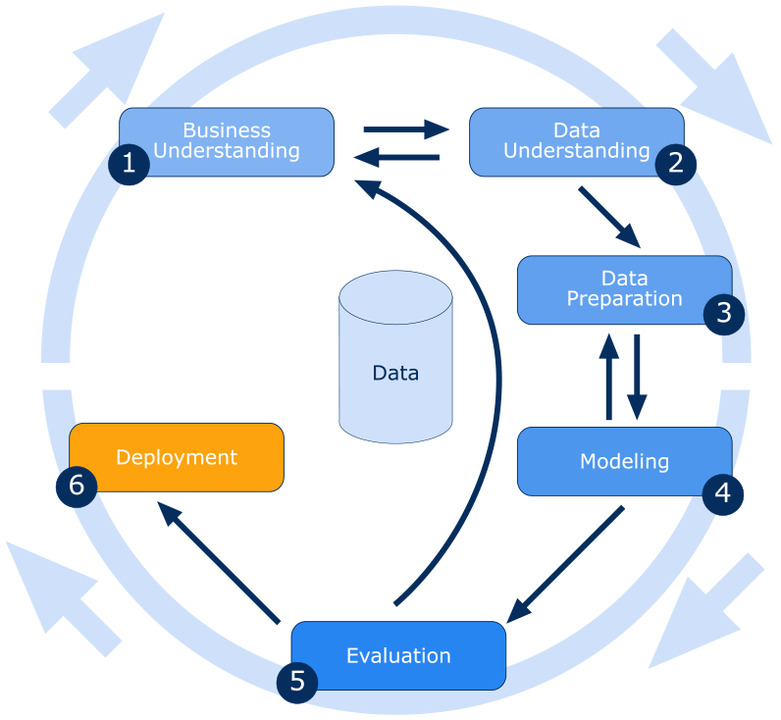

# <font color='red'>1)Business Understanding<font/>
><font color='blue'>    
1.a) Problem statment<br>
1.b) Domain<br>
1.c) Motivation<br><font/>

**1.a)Problem_statment**
    
When a customer approaches a bank for loan, the bank has to look into several factors to decide whether the person is capable of getting a loan. The problem arises when the factors are not being analysed and loans that have been provided to    such people are not repaid and it has its consequences like credit fraud.



**1.b)Domain**
    
Banking sector


**1.c)Motivation** <br>

The single biggest reason for PSBs to post a 57,832-crore turnaround - from a loss of 26,015 crore in Y20 to a combined profit of 31,817 crore - was the end of their legacy bad loan problem.(2021)

Read more at:
http://timesofindia.indiatimes.com/articleshow/83860739.cms?utm_source=contentofinterest&utm_medium=text&utm_campaign=cppst



# <font color='red'>2) Data Understanding<font/>

><font color='blue'>2.a) Feature information<br>
2.b) Reading data<br>
2.c) Shape of the data<br>
2.d) Data Description<br>
2.e) Datatypes<br>
2.f) Conclussion<br>
<font/>

### <font color='blue'> 2.a) Feature information<font/>


* **Loan ID:** id for the loan
* **Customer ID:** Id for the customer
* **Loan status:** Whether customer paid the loan completely or not (**Traget variable**)
* **Current Loan amount:** Loan amount borrowed by the customer
* **Term:** Time duration of loan(Short duration,long duration)
* **Credit score:** A three digit number that represents the credit worthiness of an individual
* **Annual Income:** anual income of customer(Rs)
* **Years in current job:** Number of years the customer working in present job
* **Home ownership:** Whether the customer has his own house or rent base mortgage(A mortgage is an agreement between you and a lender that gives the lender the right to take your property if you fail to repay the money you've borrowed plus interest. Mortgage loans are used to buy a home or to borrow money against the value of a home you already own.)
* **Purpose:** Purpose of taking loan by the customer
* **Monthly debt:** Monthly installment to be paid by the customer once he accept to get the loan
* **Years of credit history:** A credit history is the record of how a person has managed his or her credit in the past, including total debt load, number of credit lines, and timeliness of payment.
* **Months since last delinquent:** Delinquency means that you are behind on payments(Rs)
* **Number of Open Accounts:** Number of accounts in the bank
* **Number of Credit Problems:** A person is considered to have bad credit if they have a history of not paying their bills on time or owe too much money
* **Current Credit Balance:** all charges and payments made to your account up to that day
* **Maximum Open Credit:** Open credit refers to accounts that you can borrow from up to a maximum amount (like a credit card) but which must also be paid back in full each month.
* **Bankruptcies:** customer liability
* **Tax Liens:** A lien is a judgment or legal right in respect of properties that are usually used as collateral to pay a debt. A creditor or a legal opinion may create a lien. ... When the underlying duty is not fulfilled, the lender will be entitled to seize the asset, which is the subject of the lien.

In [3]:
# importing_libraries
import numpy as np   # To work with array
import pandas as pd   # for data preprocessing
import matplotlib.pyplot as plt  # for visualization
import seaborn as sns   # for visualization
import warnings  #to hide warnings
warnings.filterwarnings("ignore")
#to fit long cell values
pd.options.display.max_colwidth = 100

### <font color='blue'>2.b) Reading data<font/>

In [865]:
df_train=pd.read_csv(r'credit_train.csv')
df_test=pd.read_csv(r'credit_test.csv')
df_train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


### <font color='blue'>2.c) Shape of the data<font/>

In [866]:
df_train.shape

(100514, 19)

### <font color='blue'>2.c) Data description<font/>

In [867]:
df_train.describe()   # for numerical features

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [868]:
df_train.describe(include=object) # for categorical features

,Loan ID,Customer ID,Loan Status,Term,Years in current job,Home Ownership,Purpose
count,100000,100000,100000,100000,95778,100000,100000
unique,81999,81999,2,2,11,4,16
top,6b7e065a-9950-4422-842b-1e5c5046b299,ec408473-2de1-40cc-a9cd-0dfa2b9efbd8,Fully Paid,Short Term,10+ years,Home Mortgage,Debt Consolidation
freq,2,2,77361,72208,31121,48410,78552


### <font color='blue'>2.c) Data types<font/>

In [869]:
df_train.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

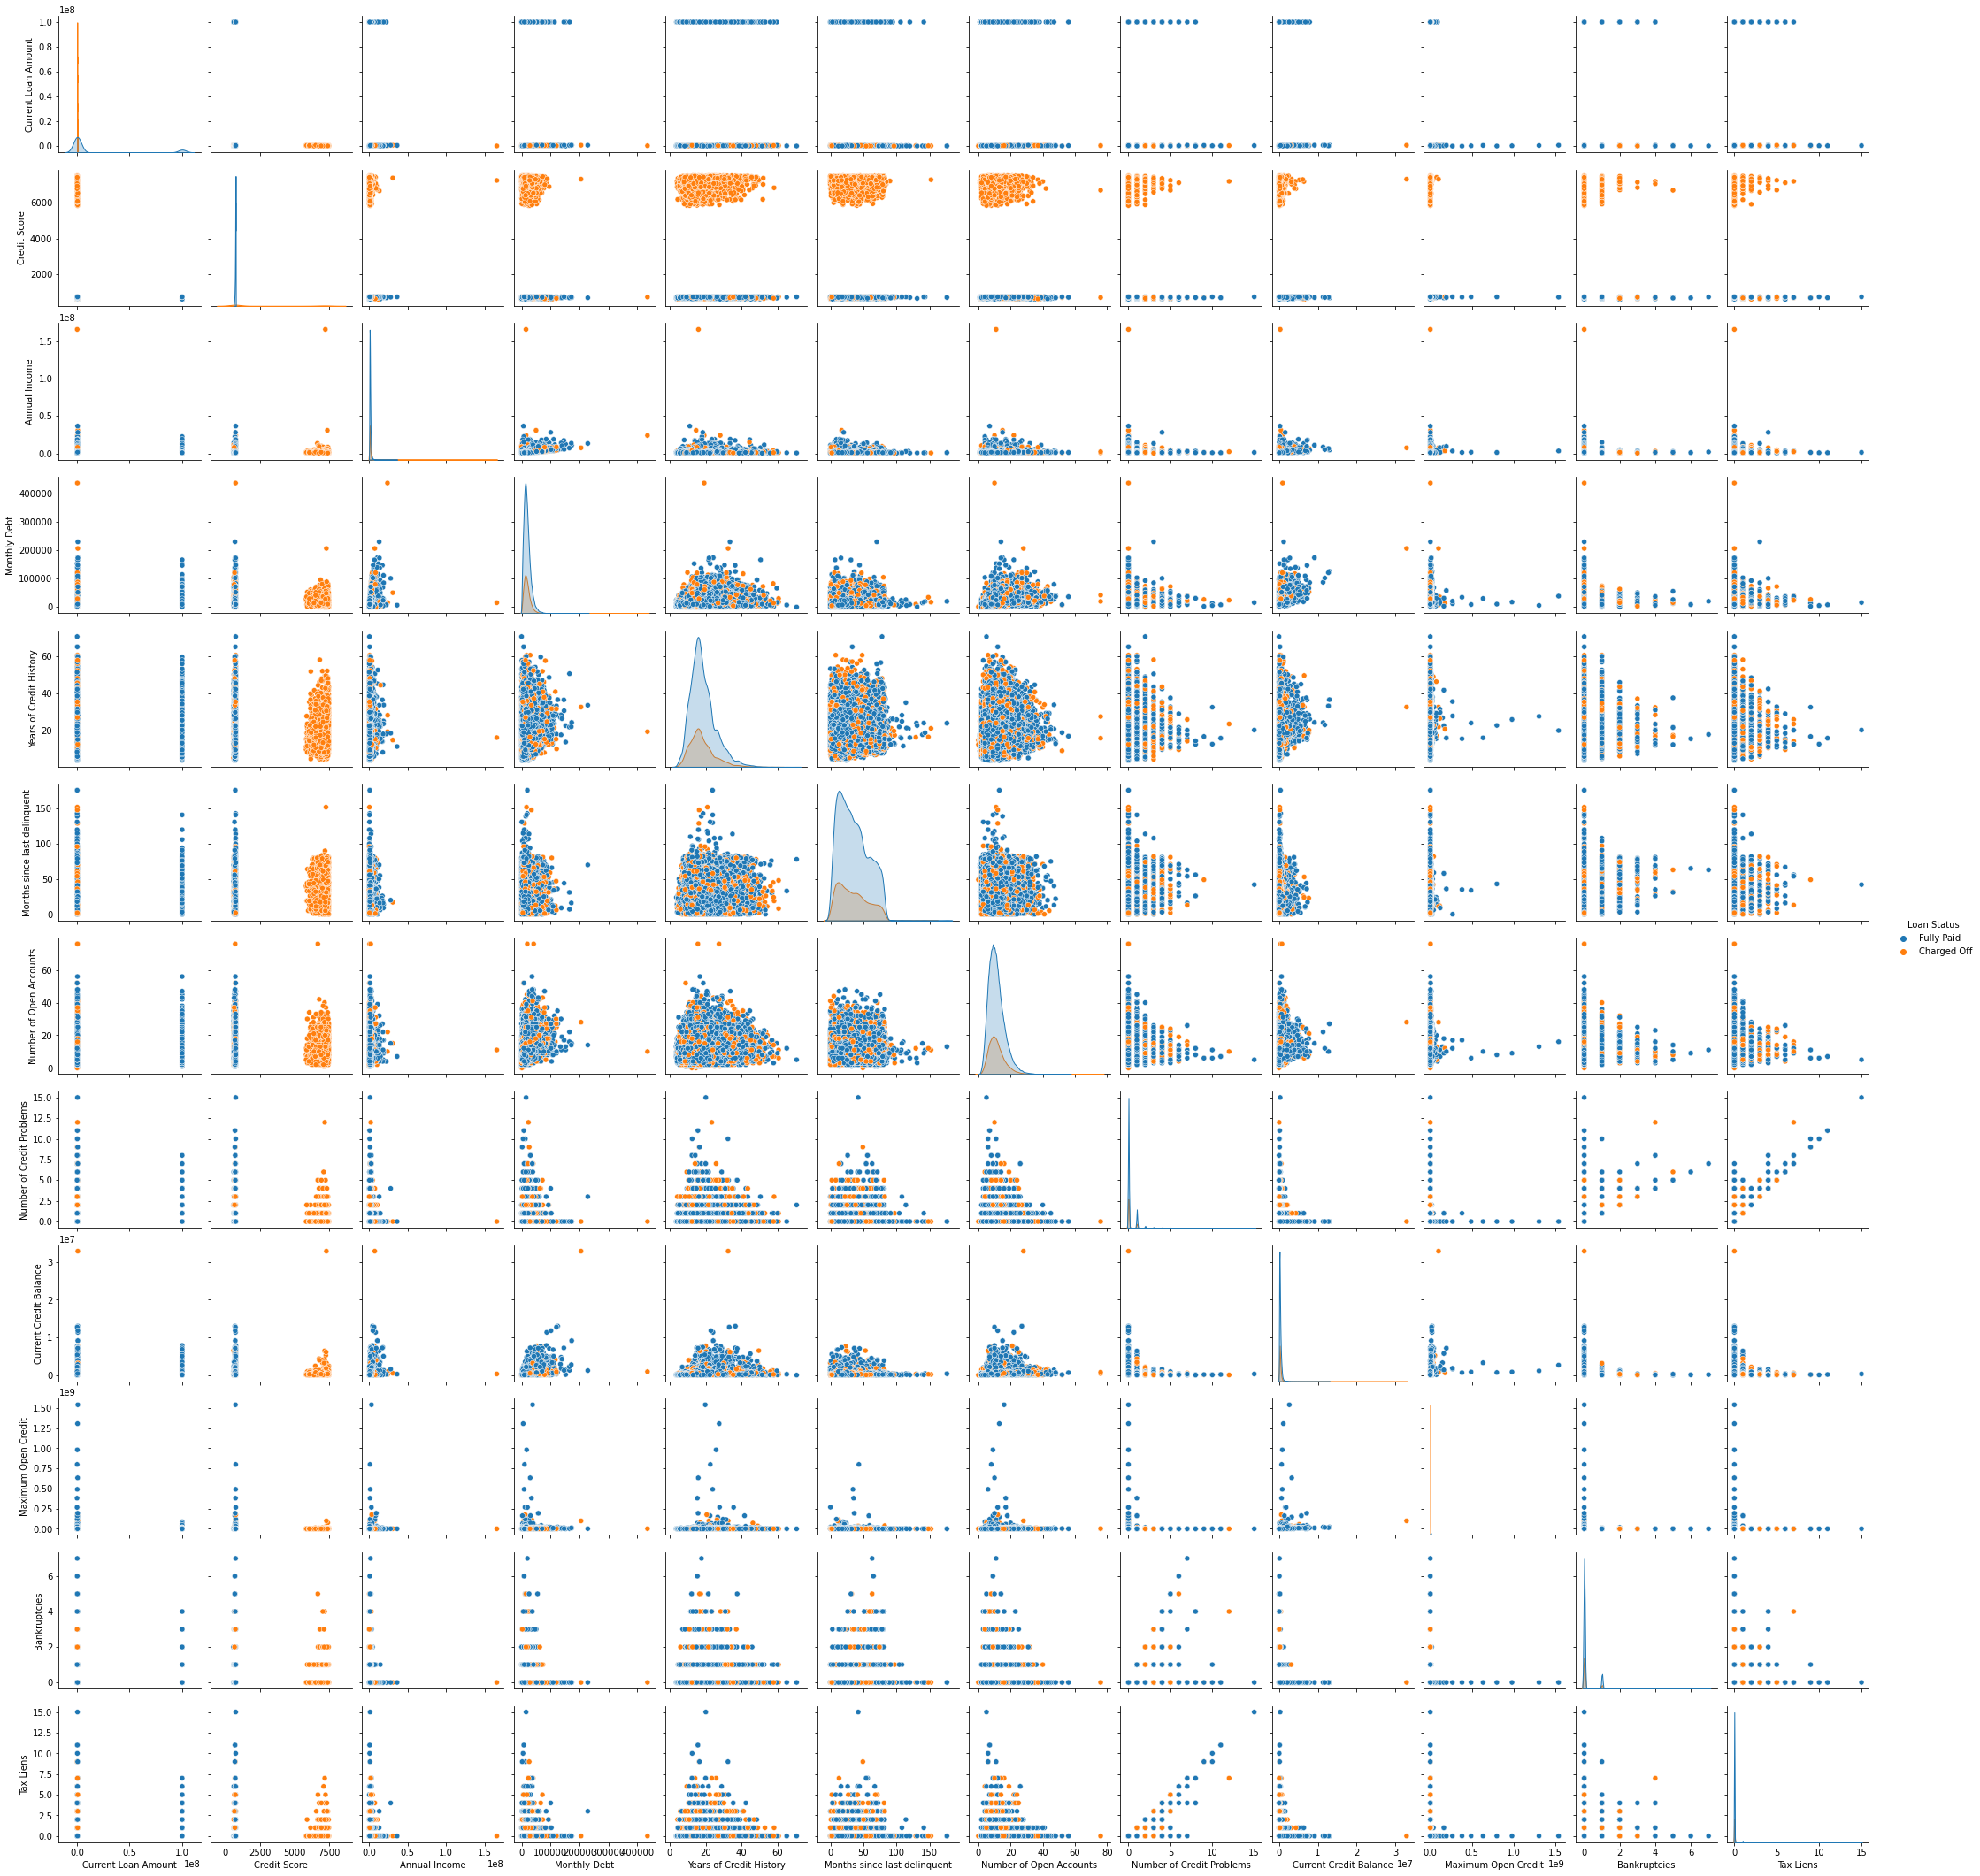

In [870]:
sns.pairplot(df_train,diag_kind='kde',hue='Loan Status')
plt.show()

### <font color='blue'>2.c) Conclusion<font/>


* **Train data have  100514 rows and 19 columns including target variable (Loan status)**<br>
* **Test data have 10353 rows and 18 columns (without target feature)**<br>
* **Credit score has maximum value 7510 which is not correct (Because credit score is three digit number)**<br>
* **Monthly debt has minimum value as 0 which is strange (because without monthly debt how loan will be provided)**<br>
* **Months since last delinquent has minimum value 0 (what it means)**<br>
* **Loan id and customer_id do not affect the target so its better to drop them**<br>
* **From description we can see that each columns have missing value (there might be null rows)**<br>
* **Loan status counts says that among 10000 observations 77361 are fully paid only ,indicates imbalanced dataset**<br>
* **Most loans are short time only**<br>
* **maximum people took loan for Debt consolidation purpose**
* **All numerical features are right skewed**
* **Current loan amount have some outliers**
* **Credit score: after 1000 all values in credit score shows loan status as charged off (which is strange we need to deal with it)**
* **Annual income have one outlier which whose Loan status is 'Charged off'**
* **Monthly dept have one outlier whose loan status is 'Charged off' and shows some linear relationship with number of open accounts**
* **Number of credit problems shows some linear relationship with tax liens (tax liens to be analyze)**
* **Current credit balance shows some relationship with monthly debt**

# <font color='red'> 3) Data Preprocessing<font/>

><font color='blue'>3.a) Data cleaning and Missing values treatment<br>
>3.a.1) Missing value treatment conclusion<br>
3.b) Handling categorical features<br>
>3.b.1) Handling categorical features conclusion<br>
3.c) Feature Engineering<br>
>3.c.1) scaling<font/>



### <font color='blue'>3.a) Data cleaning and Missing values treatmenet<font/>

In [871]:
df=df_train.copy()

In [872]:
df.isna().sum().to_frame(name='Number of Missing Values')

,Number of Missing Values
Loan ID,514
Customer ID,514
Loan Status,514
Current Loan Amount,514
Term,514
Credit Score,19668
Annual Income,19668
Years in current job,4736
Home Ownership,514
Purpose,514


In [873]:
null_ind=list(set(df.index).difference(set(df.dropna(how='all').index))) # complete null value indexes


#### Complete null value Records (Records with all columns as null)

In [874]:
df.iloc[null_ind]  

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [875]:
df=df.drop(null_ind)

### Dataframe of Missing values count and percentage 

In [876]:
miss_value=df.isna().sum().sort_values(ascending=False).to_frame()
miss_value['percentage']=(df.isna().sum().sort_values(ascending=False)/len(df))*100
miss_value.columns=['Number of missing values','Percentage ']
miss_value 

,Number of missing values,Percentage
Months since last delinquent,53141,53.141
Credit Score,19154,19.154
Annual Income,19154,19.154
Years in current job,4222,4.222
Bankruptcies,204,0.204
Tax Liens,10,0.010
Maximum Open Credit,2,0.002
Customer ID,0,0.000
Loan Status,0,0.000
Current Loan Amount,0,0.000


In [877]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

### Dropping duplicates in the columns of Loan Id and customer ID both

In [878]:
df.drop_duplicates(subset=['Loan ID', 'Customer ID'],keep='first',inplace=True)

### Remaining Missing Values after duplicate removal

In [879]:
# df.isna().sum().sort_values(ascending=False).to_frame(name='Number of Missing values')

miss_value=df.isna().sum().sort_values(ascending=False).to_frame()
miss_value['percentage']=(df.isna().sum().sort_values(ascending=False)/len(df))*100
miss_value.columns=['Number of missing values','Percentage ']
miss_value 

,Number of missing values,Percentage
Months since last delinquent,44621,54.416517
Credit Score,17031,20.769765
Annual Income,17031,20.769765
Years in current job,3508,4.278101
Bankruptcies,175,0.213417
Tax Liens,8,0.009756
Maximum Open Credit,2,0.002439
Customer ID,0,0.000000
Loan Status,0,0.000000
Current Loan Amount,0,0.000000


#### Dropping loan id and customer id as they are unique for each record and does not contribute in prediction.

In [880]:
df.drop(['Loan ID', 'Customer ID'],axis=1,inplace=True)  

In [881]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


# Handling numerical features

In [882]:
num_features=[feature for feature in df.columns if df[feature].dtype!='O']
num_features

['Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Monthly Debt',
 'Years of Credit History',
 'Months since last delinquent',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Bankruptcies',
 'Tax Liens']

### 'Current Loan Amount'

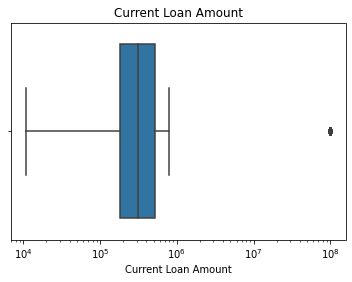

In [883]:
sns.boxplot(data=df,x='Current Loan Amount',)
plt.title('Current Loan Amount')
plt.xscale('log')
plt.show()

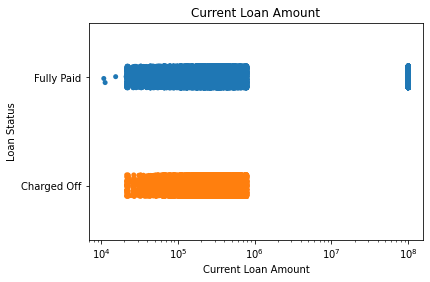

In [884]:
sns.stripplot(data=df,x='Current Loan Amount',y='Loan Status')
plt.title('Current Loan Amount')
plt.xscale('log')
plt.show()

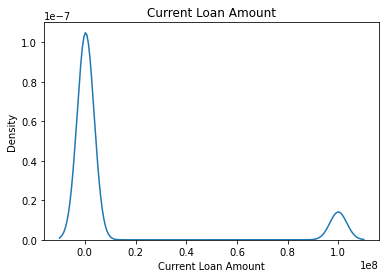

In [885]:
sns.kdeplot(data=df,x='Current Loan Amount',)
plt.title('Current Loan Amount')
# plt.xscale('log')
plt.show()

In [886]:
len(df[df['Current Loan Amount']>10**7])  

9688

* There 9688 outliers are there in 'Current Loan Amount' column 
* Its better to cap those values to avoid the impact of outliers on the model

In [887]:
mx_cur_loan_amount=df[df['Current Loan Amount']<10**7]['Current Loan Amount'].max()  # maximum value without outliers

In [888]:
df['Current Loan Amount']=df['Current Loan Amount'].agg(lambda x:mx_cur_loan_amount if x>10**7 else x)

#### After capping

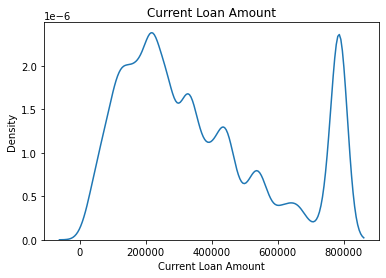

In [889]:
sns.kdeplot(data=df,x='Current Loan Amount',)   
plt.title('Current Loan Amount')
# plt.xscale('log')
plt.show()

### 'Credit Score'

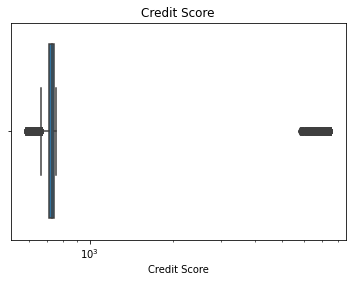

In [890]:
sns.boxplot(data=df,x='Credit Score',)
plt.title('Credit Score')
plt.xscale('log')
plt.show()

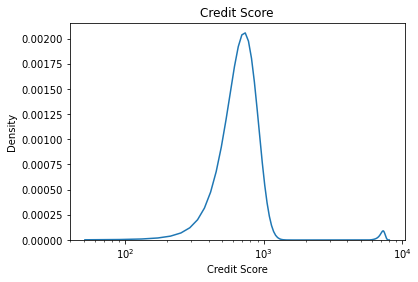

In [891]:
sns.kdeplot(data=df,x='Credit Score')
plt.title('Credit Score')
plt.xscale('log')
plt.show()

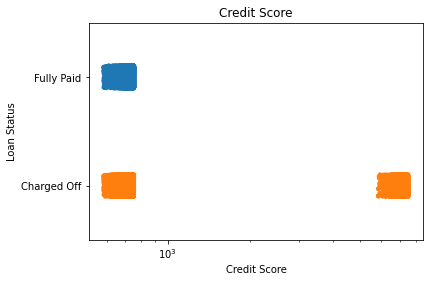

In [892]:
sns.stripplot(data=df,x='Credit Score',y='Loan Status')
plt.title('Credit Score')
plt.xscale('log')
plt.show()

* We know that credit score is three digit number but here we can see more than 3 digit value are there

In [893]:
df['Credit Score'].unique()

array([ 709.,   nan,  741.,  721., 7290.,  730.,  678.,  739.,  728.,
        740.,  743.,  727.,  723.,  747.,  687.,  750.,  714.,  724.,
        704.,  688.,  749.,  746.,  737.,  729.,  733.,  725.,  745.,
        720.,  718.,  682., 7120.,  680.,  710.,  598.,  719., 6610.,
        652.,  736., 7380.,  644.,  672., 7370.,  699.,  751.,  694.,
        675.,  657.,  748.,  666.,  734.,  742.,  705.,  731., 6240.,
        712.,  685.,  717.,  722.,  618.,  676.,  692., 7210.,  732.,
        649.,  695.,  744.,  686.,  637.,  697.,  706.,  715.,  707.,
        726.,  738., 7500.,  716., 7020.,  651.,  708.,  698.,  689.,
        735.,  703.,  693., 7080.,  645.,  691.,  673.,  700., 7140.,
        658.,  674.,  654., 7490.,  681.,  696.,  713.,  668., 7360.,
        659., 7160.,  647.,  683.,  670.,  623.,  711.,  639.,  671.,
       6990.,  614.,  667.,  701., 7410., 7310., 7040., 7060.,  615.,
       7200.,  656.,  653.,  664.,  613., 7450., 7300.,  636.,  702.,
       7430.,  594.,

* There are 4 digit numbers also and all are ending with 0 this might be typing error so lets remove that 0

In [894]:
def credit_score_correction(col):    
    if not str(col).isalnum():
        if len(str(col))>5:
            return col/10
        
    return col

In [895]:
df['Credit Score']=df['Credit Score'].agg(credit_score_correction)

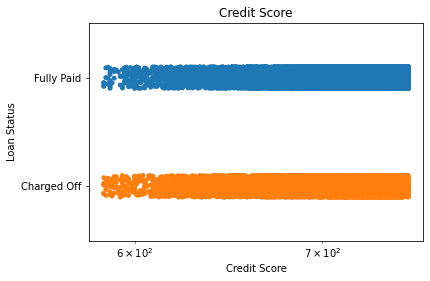

In [896]:
sns.stripplot(data=df,x='Credit Score',y='Loan Status')
plt.title('Credit Score')
plt.xscale('log')
plt.show()

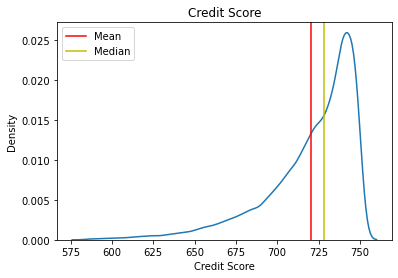

In [897]:
sns.kdeplot(data=df,x='Credit Score',)
plt.title('Credit Score')
plt.axvline(df['Credit Score'].mean(),label='Mean',color='r')
plt.axvline(df['Credit Score'].median(),label='Median',color='y')
plt.legend()
# plt.xscale('log')
plt.show()

* Here Mean < Median indicates left skewed distribution of Credit Score Data.

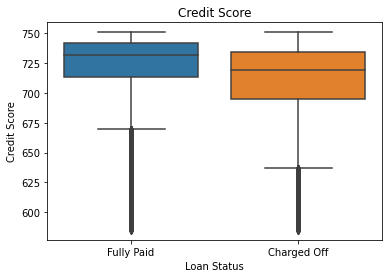

In [898]:
sns.boxplot(data=df,y='Credit Score',x='Loan Status')
plt.title('Credit Score')
# plt.xscale('log')
plt.show()

#### Lets check a hypothesis that
#### Ho: credit score for fully paid <= credit score for charged off
#### Ha: credit score for fully paid > credit score for charged off

In [899]:
from statsmodels.stats.weightstats import ztest

In [900]:
df['Loan Status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [901]:
ful_paid_cred_score=df[df['Loan Status']=='Fully Paid']['Credit Score'].dropna()
charged_off_cred_score=df[df['Loan Status']=='Charged Off']['Credit Score'].dropna()

In [902]:
ztest(ful_paid_cred_score,charged_off_cred_score)

(55.41311018853605, 0.0)

* Since p_value is less than 0.05 we reject null hypothesis and conclude that 
credit score for fully paid > credit score for charged off

In [903]:
def cred_score_imputation(cols):
    loan_status=cols[1]
    cred_score=cols[0]
    if pd.isnull(cred_score):
        if loan_status=='Fully Paid':
            return ful_paid_cred_score.median()
        if loan_status=='Charged Off':
            return charged_off_cred_score.median()
    else:
        return cred_score

In [904]:
df['Credit Score']=df[['Credit Score','Loan Status']].agg(cred_score_imputation,axis=1)

### 'Annual Income'

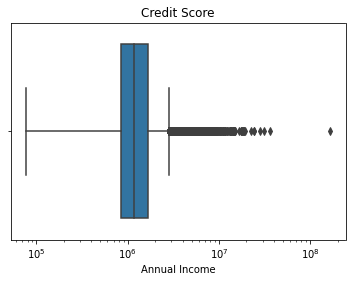

In [905]:
sns.boxplot(data=df,x='Annual Income',)
plt.title('Credit Score')
plt.xscale('log')
plt.show()

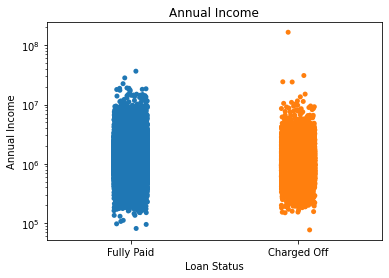

In [906]:
sns.stripplot(data=df,y='Annual Income',x='Loan Status')
plt.title('Annual Income')
plt.yscale('log')
plt.show()

In [907]:
df['Annual Income'].max()

165557393.0

In [908]:
df[df['Annual Income']==df['Annual Income'].max()]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
85662,Charged Off,176132.0,Short Term,725.0,165557393.0,10+ years,Home Mortgage,Debt Consolidation,15176.06,16.0,NaN,11.0,0.0,312778.0,669438.0,0.0,0.0


* Even though annual income is high this observation shows loan status='Charged off'

#### Dropping the outlier

In [909]:
df.drop(df[df['Annual Income']==df['Annual Income'].max()].index,inplace=True)

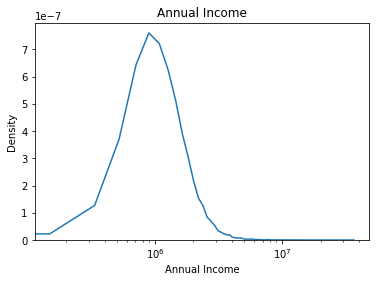

In [910]:
sns.kdeplot(data=df,x='Annual Income',)
plt.title('Annual Income')
plt.xscale('log')
plt.show()

In [911]:
df['Annual Income'].skew()

6.279507464642637

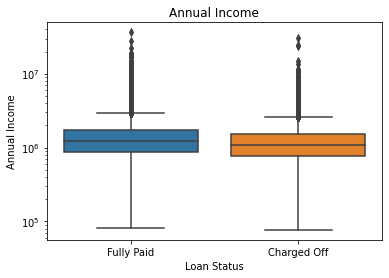

In [912]:
sns.boxplot(data=df,y='Annual Income',x='Loan Status')
plt.title('Annual Income')
plt.yscale('log')
plt.show()

In [913]:
full_paid_ann_income=df[df['Loan Status']=='Fully Paid']['Annual Income'].dropna()
charged_off_ann_income=df[df['Loan Status']=='Charged Off']['Annual Income'].dropna()

In [914]:
full_paid_ann_income.mean(),charged_off_ann_income.mean()

(1416050.5257757863, 1258242.812946714)

#### Let's do hypothesis on annual income
#### Ho : annual income(fully paid)<=annual income(charged off)
#### Ha: annual income(fully paid)>annual income(charged off)

In [915]:
ztest(full_paid_ann_income,charged_off_ann_income,0)

(19.38786069222946, 9.771747584143154e-84)

In [916]:
from scipy.stats import ttest_ind

In [917]:
ttest_ind(full_paid_ann_income,charged_off_ann_income)

Ttest_indResult(statistic=19.38786069222946, pvalue=1.6844327980771255e-83)

* Since p_value is less than 0.05 we conclude that annual income(fully paid)>annual income(charged off)

In [918]:
def annual_income_imputation(cols):
    loan_status=cols[1]
    annual_income=cols[0]
    if pd.isnull(annual_income):
        if loan_status=='Fully Paid':
            return full_paid_ann_income.median()
        if loan_status=='Charged Off':
            return charged_off_ann_income.median()
    else:
        return annual_income

In [919]:
df['Annual Income']=df[['Annual Income','Loan Status']].agg(annual_income_imputation,axis=1)

### 'Monthly Debt'

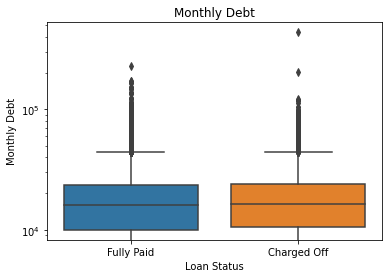

In [920]:
sns.boxplot(data=df,y='Monthly Debt',x='Loan Status')
plt.title('Monthly Debt')
plt.yscale('log')
plt.show()

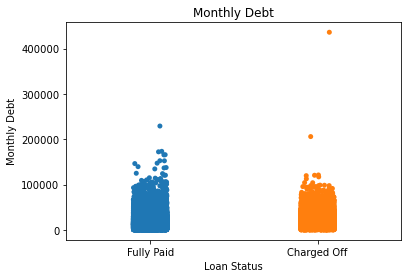

In [921]:
sns.stripplot(data=df,y='Monthly Debt',x='Loan Status')
plt.title('Monthly Debt')
# plt.xscale('log')
plt.show()

In [922]:
df[df['Monthly Debt']==df['Monthly Debt'].max()]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
25003,Charged Off,350416.0,Long Term,733.0,23980375.0,2 years,Home Mortgage,Debt Consolidation,435843.28,19.2,NaN,10.0,0.0,925794.0,1288430.0,0.0,0.0


#### Dropping the outlier

In [923]:
df.drop(df[df['Monthly Debt']==df['Monthly Debt'].max()].index,inplace=True)  

Revisiting The Number of Outliers present in dataset

In [924]:
miss_val = df.isna().sum().sort_values().to_frame(name='Number of Missing Values')
miss_val[miss_val>0].dropna()

,Number of Missing Values
Maximum Open Credit,2.0
Tax Liens,8.0
Bankruptcies,175.0
Years in current job,3508.0
Months since last delinquent,44619.0


### 'Years of Credit History'

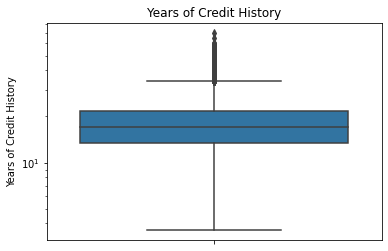

In [925]:
sns.boxplot(data=df,y='Years of Credit History',)
plt.title('Years of Credit History')
plt.yscale('log')
plt.show()

In [926]:
num_features

['Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Monthly Debt',
 'Years of Credit History',
 'Months since last delinquent',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Bankruptcies',
 'Tax Liens']

### 'Months since last delinquent'

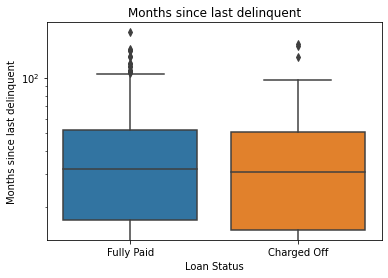

In [927]:
sns.boxplot(data=df,y='Months since last delinquent',x='Loan Status')
plt.title('Months since last delinquent')
plt.yscale('log')
plt.show()

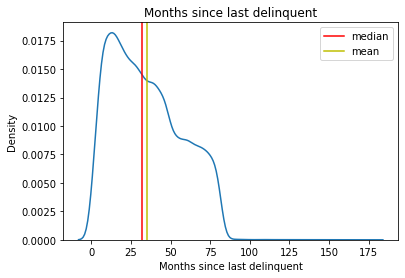

In [928]:
sns.kdeplot(data=df,x='Months since last delinquent',)
plt.title('Months since last delinquent')
plt.axvline(df['Months since last delinquent'].median(),label='median',color='r')
plt.axvline(df['Months since last delinquent'].mean(),label='mean',color='y')
plt.legend()
# plt.yscale('log')
plt.show()

* Here mean > median indicates right skewed distribution of Months since last delinquent.

In [929]:
df['Months since last delinquent'].skew()

0.4275863688981906

In [930]:
df['Months since last delinquent']=df['Months since last delinquent'].fillna(df['Months since last delinquent'].median())

In [931]:
miss_val = df.isna().sum().sort_values().to_frame(name='Number of Missing Values')
miss_val[miss_val>0].dropna()

,Number of Missing Values
Maximum Open Credit,2.0
Tax Liens,8.0
Bankruptcies,175.0
Years in current job,3508.0


#### 'Number of Open Accounts'

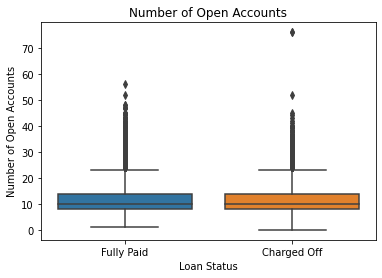

In [932]:
sns.boxplot(data=df,y='Number of Open Accounts',x='Loan Status')
plt.title('Number of Open Accounts')
# plt.yscale('log')
plt.show()

In [933]:
df[df['Number of Open Accounts']==df['Number of Open Accounts'].max()]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
88341,Charged Off,412610.0,Long Term,670.0,891328.0,7 years,Rent,Debt Consolidation,19609.14,27.4,32.0,76.0,0.0,420109.0,618882.0,0.0,0.0
96033,Charged Off,449372.0,Short Term,708.0,2328564.0,5 years,Home Mortgage,Debt Consolidation,41720.20,15.7,32.0,76.0,0.0,771514.0,2674650.0,0.0,0.0


#### Dropping the extreme few outlier points in Number of Open Accounts

In [934]:
df.drop(df[df['Number of Open Accounts']==df['Number of Open Accounts'].max()].index,inplace=True)

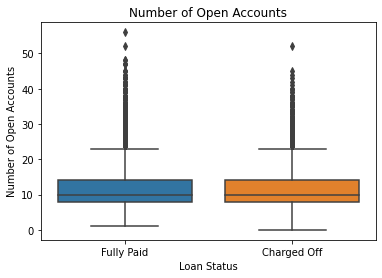

In [935]:
sns.boxplot(data=df,y='Number of Open Accounts',x='Loan Status')
plt.title('Number of Open Accounts')
# plt.yscale('log')
plt.show()

### 'Number of Credit Problems'

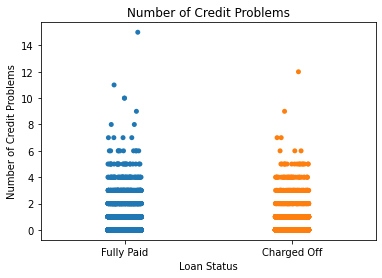

In [936]:
sns.stripplot(data=df,y='Number of Credit Problems',x='Loan Status')
plt.title('Number of Credit Problems')
# plt.xscale('log')
plt.show()

In [937]:
num_features

['Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Monthly Debt',
 'Years of Credit History',
 'Months since last delinquent',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Bankruptcies',
 'Tax Liens']

#### 'Current Credit Balance'

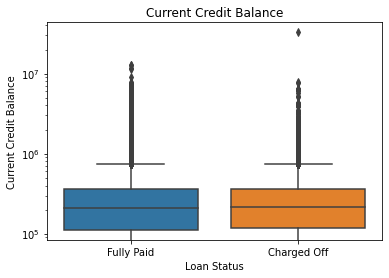

In [938]:
sns.boxplot(data=df,y='Current Credit Balance',x='Loan Status')
plt.title('Current Credit Balance')
plt.yscale('log')
plt.show()

In [939]:
df[df['Current Credit Balance']==df['Current Credit Balance'].max()]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
15837,Charged Off,762850.0,Short Term,732.0,7529320.0,10+ years,Home Mortgage,other,205801.35,32.5,32.0,28.0,0.0,32878968.0,98627914.0,0.0,0.0


#### Dropping extreme values in Current Credit Balance

In [940]:
df.drop(df[df['Current Credit Balance']==df['Current Credit Balance'].max()].index,inplace=True)

### 'Maximum Open Credit'

<font color='red'>Note :  We need more clarity around this feature in dataset<font/>

In [941]:
df[df['Current Loan Amount']>df['Maximum Open Credit']]   

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,32.0,6.0,1.0,228190.0,416746.0,1.0,0.0
2,Fully Paid,789250.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
10,Fully Paid,789250.0,Short Term,728.0,714628.0,3 years,Rent,Debt Consolidation,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0
12,Fully Paid,789250.0,Short Term,740.0,776188.0,< 1 year,Own Home,Debt Consolidation,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0
13,Fully Paid,789250.0,Short Term,743.0,1560907.0,4 years,Rent,Debt Consolidation,17560.37,13.3,32.0,10.0,1.0,225549.0,496474.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99938,Fully Paid,90398.0,Short Term,735.0,855038.0,10+ years,Home Mortgage,Buy a Car,6583.69,16.5,28.0,4.0,0.0,9861.0,32274.0,0.0,0.0
99958,Fully Paid,242682.0,Short Term,734.0,2272514.0,2 years,Rent,Debt Consolidation,24808.30,20.8,18.0,6.0,0.0,96273.0,137126.0,0.0,0.0
99990,Fully Paid,789250.0,Short Term,742.0,1190046.0,< 1 year,Rent,other,11969.81,20.1,16.0,9.0,0.0,37392.0,134442.0,0.0,0.0
99996,Fully Paid,789250.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0


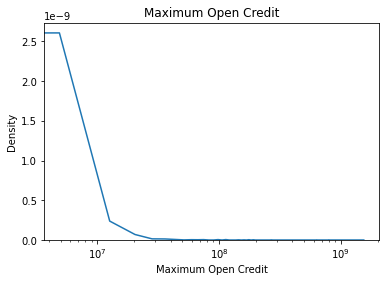

In [942]:
sns.kdeplot(data=df,x='Maximum Open Credit',)
plt.title('Maximum Open Credit')
plt.xscale('log')
plt.show()

In [943]:
df['Maximum Open Credit'].mode()   

0    0.0
dtype: float64

In [944]:
df['Maximum Open Credit']=df['Maximum Open Credit'].fillna(df['Maximum Open Credit'].median())

#### 'Bankruptcies'

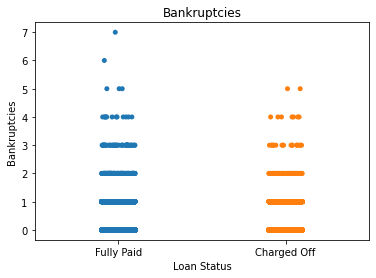

In [945]:
sns.stripplot(data=df,y='Bankruptcies',x='Loan Status')
plt.title('Bankruptcies')
# plt.yscale('log')
plt.show()

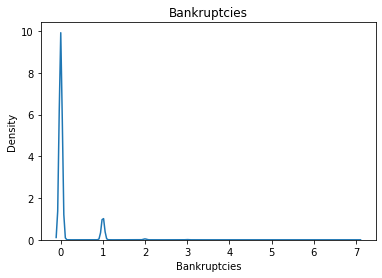

In [946]:
sns.kdeplot(data=df,x='Bankruptcies',)
plt.title('Bankruptcies')
# plt.yscale('log')
plt.show()

In [947]:
df['Bankruptcies'].value_counts()

0.0    73096
1.0     8296
2.0      329
3.0       72
4.0       19
5.0        5
7.0        1
6.0        1
Name: Bankruptcies, dtype: int64

In [948]:
df['Bankruptcies']=df['Bankruptcies'].fillna(0)

#### 'Tax Liens'

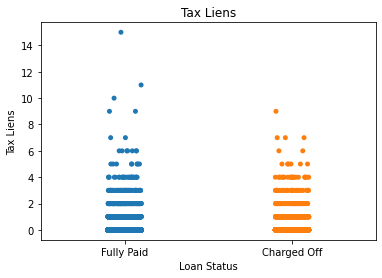

In [949]:
sns.stripplot(data=df,y='Tax Liens',x='Loan Status')
plt.title('Tax Liens')
# plt.yscale('log')
plt.show()

In [950]:
df['Tax Liens'].value_counts()

0.0     80486
1.0      1040
2.0       286
3.0        93
4.0        47
5.0        14
6.0         9
7.0         5
9.0         3
15.0        1
11.0        1
10.0        1
Name: Tax Liens, dtype: int64

In [951]:
df['Tax Liens']=df['Tax Liens'].fillna(0)

In [952]:
miss_val = df.isna().sum().sort_values().to_frame(name='Number of Missing Values')
miss_val[miss_val>0].dropna()

,Number of Missing Values
Years in current job,3508.0


# Handling categorical features

In [953]:
cat_features=[feature for feature in df.columns if feature not in num_features]

In [954]:
cat_features

['Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']

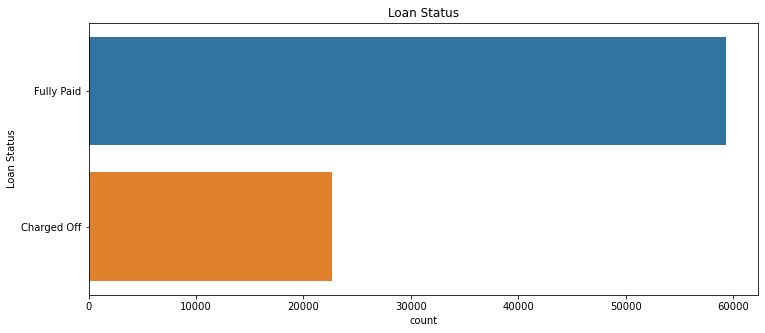

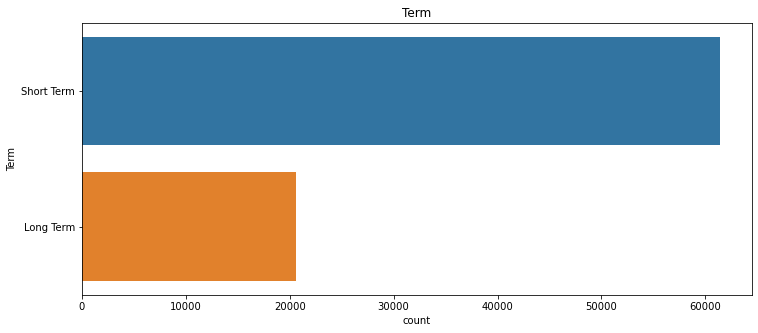

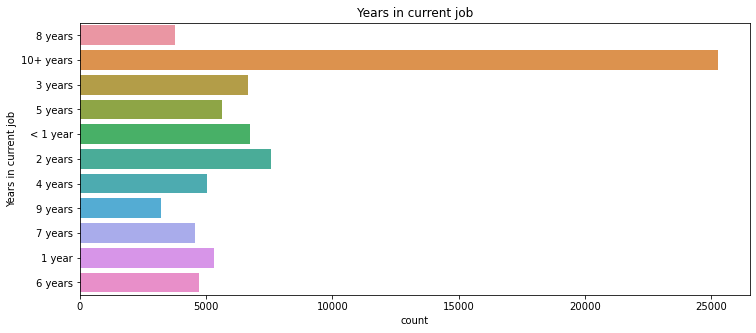

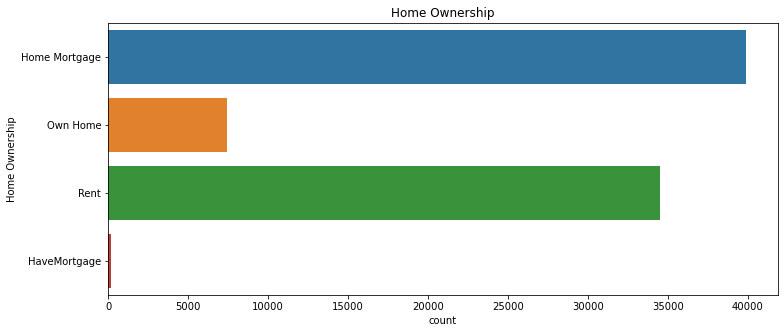

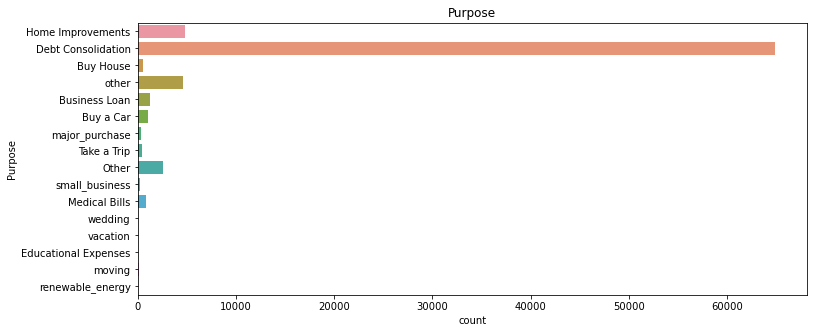

In [955]:
for i in cat_features:
    plt.figure(figsize=(12,5))
    sns.countplot(y=df[i])
    plt.title(i)
    plt.show()

In [956]:
df.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [957]:
df['Years in current job']=df['Years in current job'].fillna('10+ years')

In [958]:
df['Years in current job'].mode()

0    10+ years
dtype: object

In [959]:
miss_val = df.isna().sum().sort_values().to_frame(name='Number of Missing Values')
miss_val[miss_val>0].dropna()

,Number of Missing Values


In [960]:
cat_features

['Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']

### Checking whether all categorical features have relationship with target columns or not
### Statistical test to use : Chi-square Test of Contingency.

In [961]:
from scipy import stats

In [962]:
chi_df=pd.DataFrame()
feat=[]
rel=[]
p_value=[]
for i in cat_features:
    if i!='Loan Status':
        d_f=(df['Loan Status'].nunique()-1)*(df[i].nunique())
        c_t=pd.crosstab(df[i],df['Loan Status'])
        if d_f>1:
            chi_val,p_val,d,exp=stats.chi2_contingency(observed=c_t)
        else:
            chi_val,p_val,d,exp=stats.chi2_contingency(observed=c_t,correction=True)
            
        if p_val<0.05:
            feat.append(i)
            p_value.append(p_val)
            rel.append('related')
        else:
            feat.append(i)
            p_value.append(p_val)
            rel.append('Not related')
            

In [963]:
chi_df['cat_feature']=feat
chi_df['p_val']=p_value
chi_df['Related_or_not']=rel

In [964]:
chi_df

,cat_feature,p_val,Related_or_not
0,Term,0.000000e+00,related
1,Years in current job,1.100220e-02,related
2,Home Ownership,2.167682e-70,related
3,Purpose,4.443265e-53,related


###  All categorical features are related to target(Loan Status)

# NOW DATA IS FREE OF MISSING VALUES

### Extended EDA on categorical variables after missing values treatment.

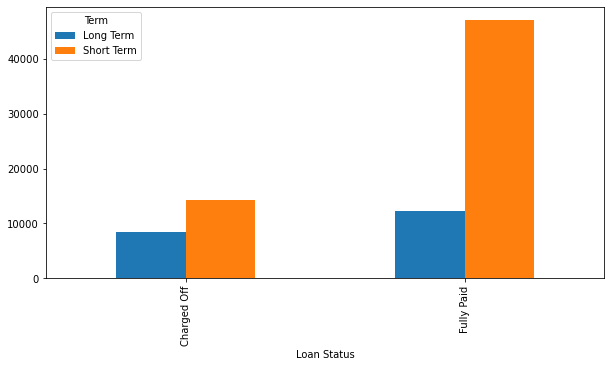

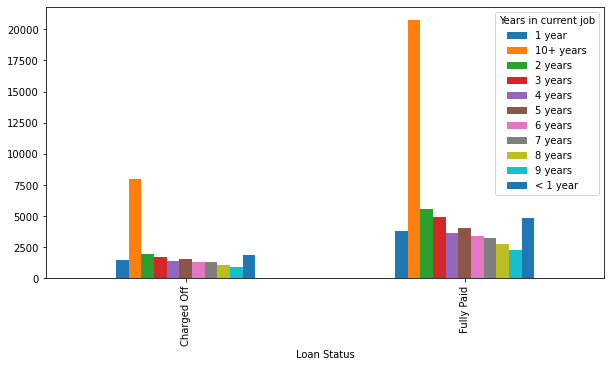

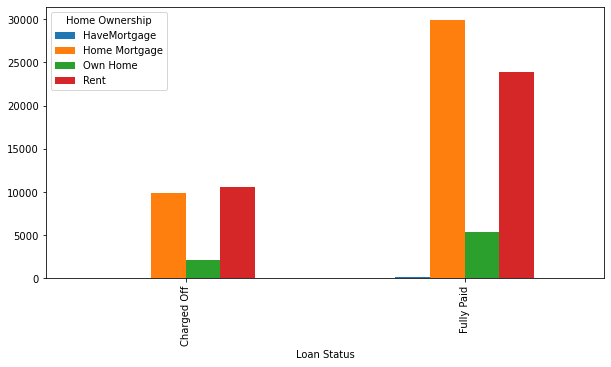

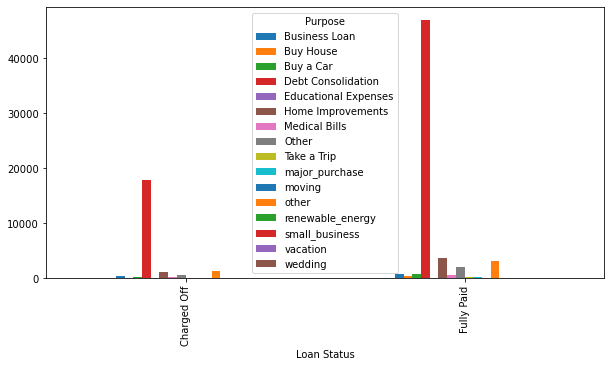

In [965]:
cat_features
for i in cat_features:
    if i!='Loan Status':
        pd.crosstab(df['Loan Status'],df[i]).plot(kind='bar',figsize=(10,5))
        plt.show()

### Avoiding the impact of imbalanced data

In [966]:
df['Loan Status'].value_counts()

Fully Paid     59360
Charged Off    22634
Name: Loan Status, dtype: int64

In [967]:
%matplotlib inline

In [968]:
def func(cols):
    l_status=cols[0]
    l_term=cols[1]
    if l_status=='Charged Off':
        return l_term/22634
    else:
        return l_term/59360

Loan Status
Term
['Short Term' 'Long Term']


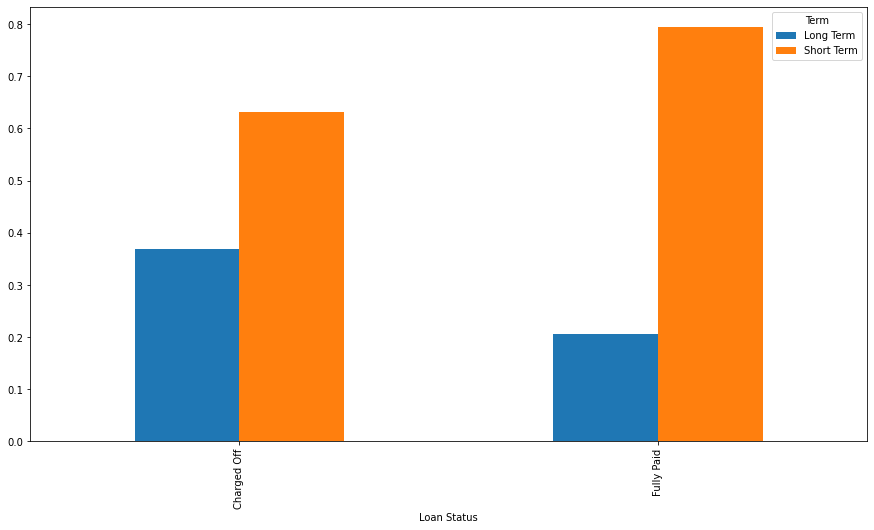

Years in current job
['8 years' '10+ years' '3 years' '5 years' '< 1 year' '2 years' '4 years'
 '9 years' '7 years' '1 year' '6 years']


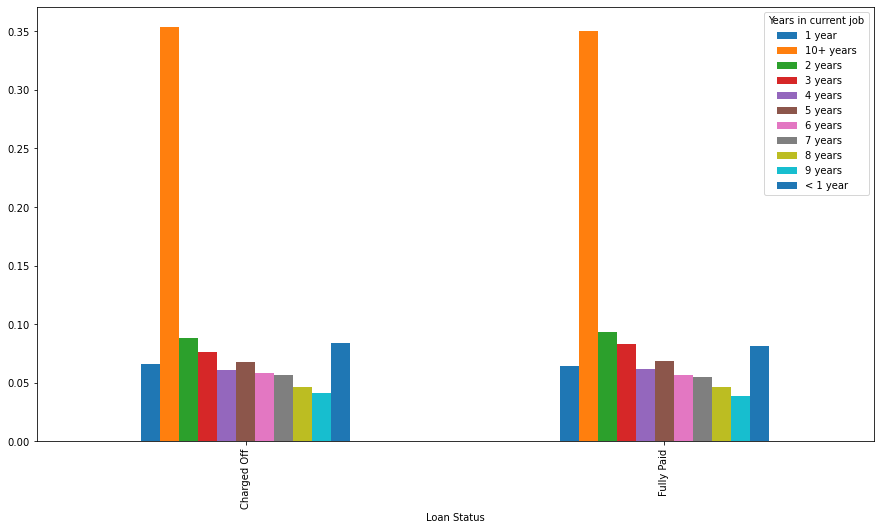

Home Ownership
['Home Mortgage' 'Own Home' 'Rent' 'HaveMortgage']


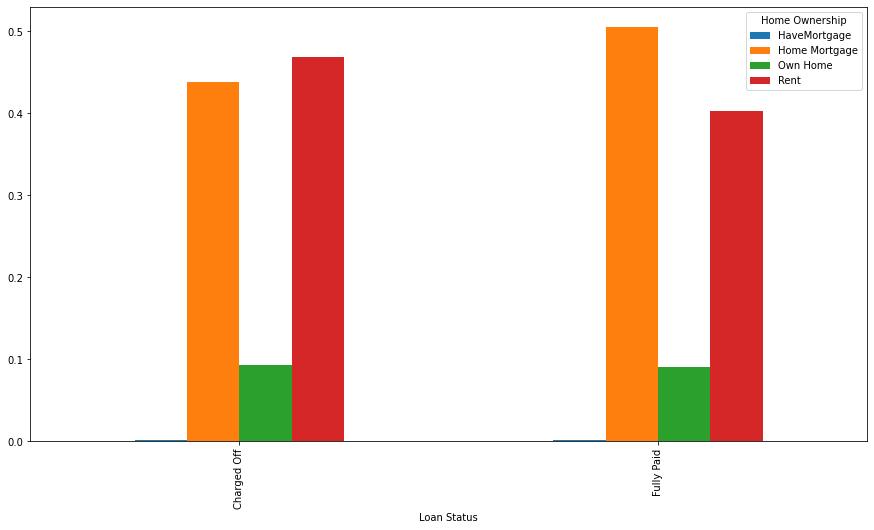

Purpose
['Home Improvements' 'Debt Consolidation' 'Buy House' 'other'
 'Business Loan' 'Buy a Car' 'major_purchase' 'Take a Trip' 'Other'
 'small_business' 'Medical Bills' 'wedding' 'vacation'
 'Educational Expenses' 'moving' 'renewable_energy']


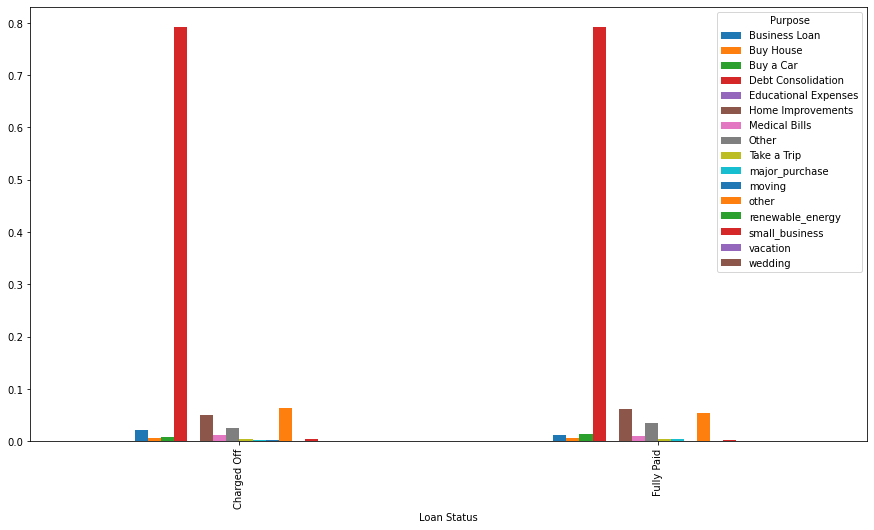

In [969]:
for i in cat_features:
    print(i)
    if i!='Loan Status':
        c_t=pd.crosstab(df['Loan Status'],df[i])
        c_t.reset_index(inplace=True)
        uniq_features=df[i].unique()
        print(uniq_features)
        for j in uniq_features:
            c_t[j]=c_t[['Loan Status',j]].agg(func,axis=1)
        c_t.set_index('Loan Status',inplace=True)
        c_t.plot(kind='bar',figsize=(15,8))
        plt.show()
    

* Among long term kind of loan most of are charged off
* Remaining all features shows equal proportion in both charged off and fully paid

In [970]:
df.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [971]:
df['Number of Credit Problems'].unique()

array([ 1.,  0.,  2.,  5.,  4.,  3.,  7.,  6., 11., 15., 10.,  8.,  9.,
       12.])

Number of Credit Problems
[ 1.  0.  2.  5.  4.  3.  7.  6. 11. 15. 10.  8.  9. 12.]


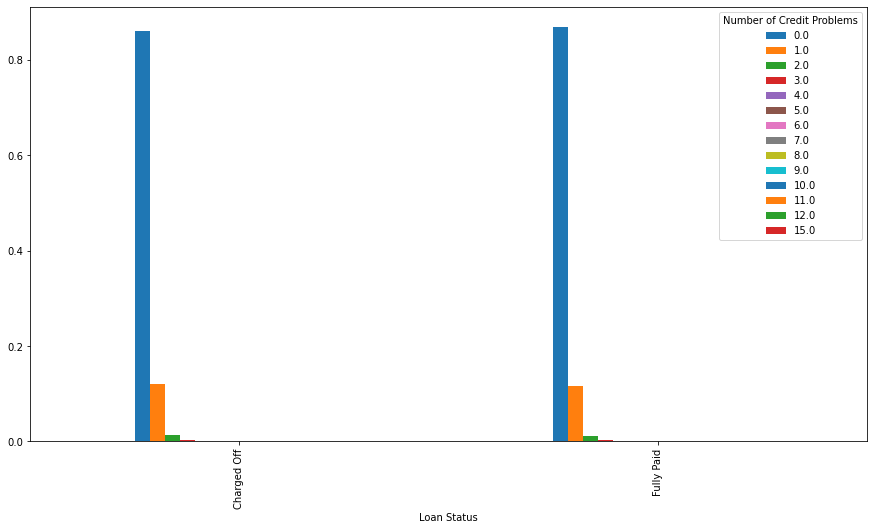

In [972]:
    i='Number of Credit Problems'
    print(i)
    if i!='Loan Status':
        c_t=pd.crosstab(df['Loan Status'],df[i])
        c_t.reset_index(inplace=True)
        uniq_features=df[i].unique()
        print(uniq_features)
        for j in uniq_features:
            c_t[j]=c_t[['Loan Status',j]].agg(func,axis=1)
        c_t.set_index('Loan Status',inplace=True)
        c_t.plot(kind='bar',figsize=(15,8))
        plt.show()

Bankruptcies
[1. 0. 2. 3. 5. 4. 7. 6.]


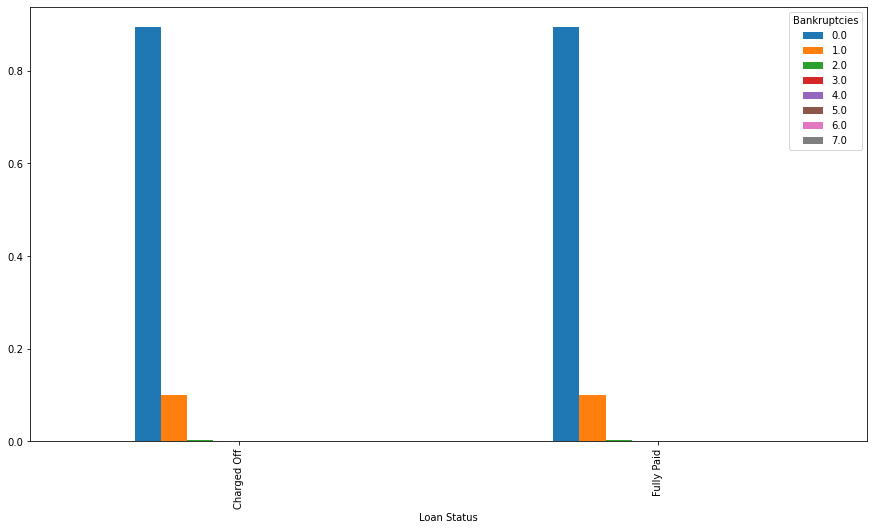

In [973]:
    i='Bankruptcies'
    print(i)
    if i!='Loan Status':
        c_t=pd.crosstab(df['Loan Status'],df[i])
        c_t.reset_index(inplace=True)
        uniq_features=df[i].unique()
        print(uniq_features)
        for j in uniq_features:
            c_t[j]=c_t[['Loan Status',j]].agg(func,axis=1)
        c_t.set_index('Loan Status',inplace=True)
        c_t.plot(kind='bar',figsize=(15,8))
        plt.show()

Tax Liens
Tax Liens     0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   9.0   10.0  \
Loan Status                                                                
Charged Off  22145   330    90    36    21     6     2     3     1     0   
Fully Paid   58349   710   196    57    26     8     7     2     2     1   

Tax Liens    11.0  15.0  
Loan Status              
Charged Off     0     0  
Fully Paid      1     1  
[ 0.  1.  2.  4.  3.  6.  5. 11. 15.  9.  7. 10.]
Tax Liens        0.0       1.0       2.0       3.0       4.0       5.0   \
Loan Status                                                               
Charged Off  0.978395  0.014580  0.003976  0.001591  0.000928  0.000265   
Fully Paid   0.982968  0.011961  0.003302  0.000960  0.000438  0.000135   

Tax Liens        6.0       7.0       9.0       10.0      11.0      15.0  
Loan Status                                                              
Charged Off  0.000088  0.000133  0.000044  0.000000  0.000000  0.000000  
Fully Pa

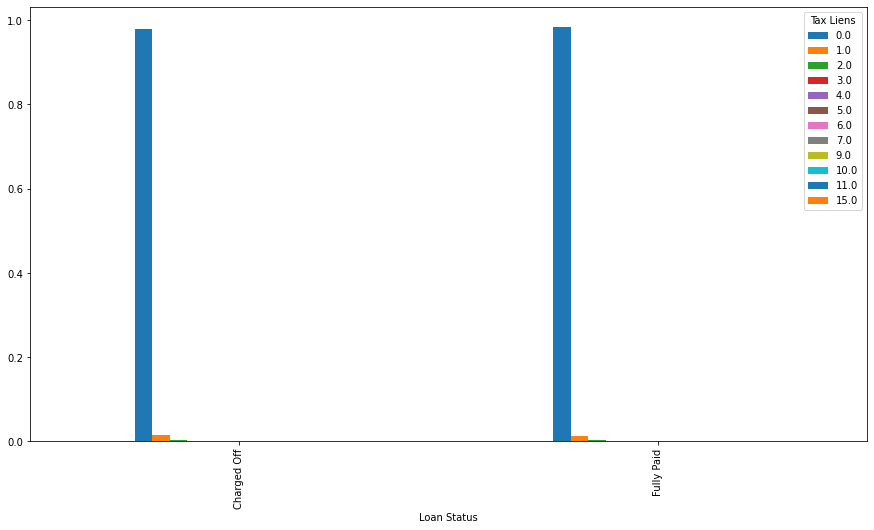

In [974]:
    i='Tax Liens'
    print(i)
    if i!='Loan Status':
        c_t=pd.crosstab(df['Loan Status'],df[i])
        print(c_t)
        c_t.reset_index(inplace=True)
        uniq_features=df[i].unique()
        print(uniq_features)
        for j in uniq_features:
            c_t[j]=c_t[['Loan Status',j]].agg(func,axis=1)
        c_t.set_index('Loan Status',inplace=True)
        print(c_t)
        c_t.plot(kind='bar',figsize=(15,8))
        plt.show()

In [975]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,32.0,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,732.0,1219961.5,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,789250.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,32.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,732.0,1219961.5,5 years,Rent,Debt Consolidation,20639.70,6.1,32.0,15.0,0.0,253460.0,427174.0,0.0,0.0


In [976]:
df.to_csv('credit_train_cleaned.csv', index=False)

# Summary:
* Under standing the feature name and what it tells about real world data.
* Impractical values are taken care of by removal and imputation.
* Till this part of analysis is done as a part of EDA.
* Here we explored relationship among the features and target variables.
* Treatment of missing values and outliers.
* Proper Visualization and Statistical Tests are performed to get initial inference about the data distribution and dependency with target variable.
* Cleaned data is exported for future reference and to keep raw and cleaned data separately.

# <font color='red'>4)MODELLING<font/>

<font color='blue'>4.a) Categorical variable handling<br>
4.b) splitting data<br>
4.c) Logistic regression(taking threshold=0.5)<br> 
4.c.1) Full model without scaling<br>
4.c.2) Full model with scaling<br>
4.c.3) Model with balanced data <br>
4.c.4) Model with important features<br>

4.d) Decision tree classifier<br>
4.d.1) Full model<br>
4.d.1) Model with selected features<br>

4.e) Selected best model with hyper parameter tuning<font/>

#### Importing Required Libraries for Model Building

In [4]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,roc_auc_score

from sklearn import set_config
set_config(display='diagram')

#### Pre-Processed Cleaned Data from EDA

In [5]:
df = pd.read_csv('credit_train_cleaned.csv')

df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,32.0,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,732.0,1219961.5,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,789250.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,32.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,732.0,1219961.5,5 years,Rent,Debt Consolidation,20639.70,6.1,32.0,15.0,0.0,253460.0,427174.0,0.0,0.0


# <font color='blue'>4.a) Categorical variable handling<font/>

#### Checking cardinality of Categorical columns

In [9]:
cat_df  = df.select_dtypes(include='O')

In [10]:
cat_columns = cat_df.columns

cat_columns

Index(['Loan Status', 'Term', 'Years in current job', 'Home Ownership',
       'Purpose'],
      dtype='object')

In [11]:
card_list=[]
for i in cat_columns:
        card = df[i].nunique()
        card_list.append(card)
        
card_df = pd.DataFrame({'Cardinality':card_list},index = cat_columns)  
card_df.sort_values(by='Cardinality')[1:]

,Cardinality
Term,2
Home Ownership,4
Years in current job,11
Purpose,16


* Ideally from Machine Learning Model Building perspective we should ideally consider the categorical columns with low cardinality.
* So, any column with cardinality > 10 should not be considered.
* But , as we have few categorical columns , we consider all the categorical features for our model.
* We prefer dummy encoding here , as we have cardinal categorical data mostly. 

In [12]:
df=pd.get_dummies(df,drop_first=True)

#### List of Columns after Performing Dummy Encoding

In [13]:
df.columns

Index(['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'Loan Status_Fully Paid', 'Term_Short Term',
       'Years in current job_10+ years', 'Years in current job_2 years',
       'Years in current job_3 years', 'Years in current job_4 years',
       'Years in current job_5 years', 'Years in current job_6 years',
       'Years in current job_7 years', 'Years in current job_8 years',
       'Years in current job_9 years', 'Years in current job_< 1 year',
       'Home Ownership_Home Mortgage', 'Home Ownership_Own Home',
       'Home Ownership_Rent', 'Purpose_Buy House', 'Purpose_Buy a Car',
       'Purpose_Debt Consolidation', 'Purpose_Educational Expenses',
       'Purpose_Home Improvements', 'Purpose_Medical Bills', 'Purpose_Other',
       'Purp

In [14]:
df.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,445412.0,709.0,1167493.0,5214.74,17.2,32.0,6.0,1.0,228190.0,416746.0,...,0,0,0,0,0,0,0,0,0,0
1,262328.0,732.0,1219961.5,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,...,0,0,0,0,0,0,0,0,0,0
2,789250.0,741.0,2231892.0,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,...,0,0,0,0,0,0,0,0,0,0
3,347666.0,721.0,806949.0,8741.90,12.0,32.0,9.0,0.0,256329.0,386958.0,...,0,0,0,0,0,0,0,0,0,0
4,176220.0,732.0,1219961.5,20639.70,6.1,32.0,15.0,0.0,253460.0,427174.0,...,0,0,0,0,0,0,0,0,0,0


### <font color='blue'>4.o) Spliting data in Train and Test Set <font/>

In [15]:
x=df.drop('Loan Status_Fully Paid',axis=1)
y=df['Loan Status_Fully Paid']
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.3,random_state=42)

In [16]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (57395, 41)
x_test (24599, 41)
y_train (57395,)
y_test (24599,)


### Initializing a Data Frame to Track Model Performances

In [14]:
model_performance=pd.DataFrame({'Model':[],'accuracy':[],'roc_auc':[]})

# <font color='blue'>4.a) Logistic regression<font/>


### <font color='blue'>4.a.1) Full model without scaling<font/>

In [15]:
model1=LogisticRegression(random_state=10)
model1.fit(x_train,y_train)
y_pred_logit_full_model=model1.predict(x_test)

In [16]:
print('training accuracy',model1.score(x_train,y_train))
print('testing accuracy',model1.score(x_test,y_test))

training accuracy 0.7233034236431745
testing accuracy 0.7231188259685353


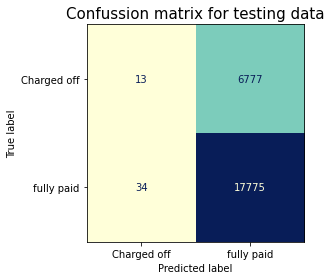

In [17]:
print(plot_confusion_matrix(estimator=model1,X=x_test,y_true=y_test,
                            cmap="YlGnBu",colorbar=False,display_labels=['Charged off','fully paid']))
plt.title('Confussion matrix for testing data',size=15)
plt.show()

In [18]:
print(classification_report(y_test,y_pred_logit_full_model))

              precision    recall  f1-score   support

           0       0.28      0.00      0.00      6790
           1       0.72      1.00      0.84     17809

    accuracy                           0.72     24599
   macro avg       0.50      0.50      0.42     24599
weighted avg       0.60      0.72      0.61     24599



In [19]:
roc_auc_score(y_test,model1.predict_proba(x_test)[:,1])

0.6286112431279678

In [20]:
model_performance=model_performance.append(pd.DataFrame({'Model':['Logistic full model(unscaled)'],'accuracy':[0.72],'roc_auc':[0.63]}),ignore_index=True)

In [21]:
model_performance

,Model,accuracy,roc_auc
0,Logistic full model(unscaled),0.72,0.63


### <font color='blue'> Model is biased towards class 1(fully paid) this might be because of imbalanced data<font/>

### <font color='blue'>4.c.2) Full model with scaling<font>

In [22]:
scale=StandardScaler()
scale.fit(x_train)
x_train_scale=scale.transform(x_train)
x_test_scale=scale.transform(x_test)

In [23]:
model2=LogisticRegression(random_state=10)
model2.fit(x_train_scale,y_train)
y_pred_logit_full_model_scaled=model2.predict(x_test_scale)

In [24]:
print('training accuracy',model2.score(x_train_scale,y_train))
print('testing accuracy',model2.score(x_test_scale,y_test))

training accuracy 0.7262827772454047
testing accuracy 0.7247449083296069


In [25]:
confusion_matrix(y_test,y_pred_logit_full_model_scaled)

array([[  884,  5906],
       [  865, 16944]], dtype=int64)

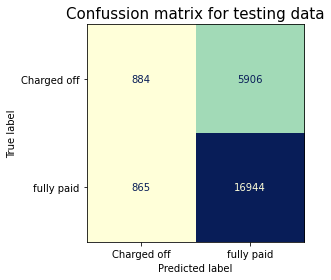

In [26]:
print(plot_confusion_matrix(estimator=model2,X=x_test_scale,y_true=y_test,
                            cmap="YlGnBu",colorbar=False,display_labels=['Charged off','fully paid']))
plt.title('Confussion matrix for testing data',size=15)
plt.show()

In [27]:
print(classification_report(y_test,y_pred_logit_full_model_scaled))

              precision    recall  f1-score   support

           0       0.51      0.13      0.21      6790
           1       0.74      0.95      0.83     17809

    accuracy                           0.72     24599
   macro avg       0.62      0.54      0.52     24599
weighted avg       0.68      0.72      0.66     24599



In [28]:
roc_auc_score(y_test,model2.predict_proba(x_test_scale)[:,1])

0.709977108594048

In [29]:
model_performance=model_performance.append(pd.DataFrame({'Model':['Logistic full model(scaled)'],'accuracy':[0.72],'roc_auc':[0.71]}),ignore_index=True)

In [30]:
model_performance

,Model,accuracy,roc_auc
0,Logistic full model(unscaled),0.72,0.63
1,Logistic full model(scaled),0.72,0.71


* Scaling didn't improve the score much.

### <font color='blue'> Model is biased towards class 1(fully paid) this might be because of imbalanced data<font/>

### <font color='blue'>4.c.3) Model with balanced data<font/>

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
sm=SMOTE(random_state=42)

x_res,y_res=sm.fit_resample(x,y)

#### After applying SMOTE Over-sampling technique, both classes counts are equal.

In [19]:
print('before_smote\n')
print(y.value_counts())
print('after smote\n')  
print(y_res.value_counts())

before_smote

1    59360
0    22634
Name: Loan Status_Fully Paid, dtype: int64
after smote

1    59360
0    59360
Name: Loan Status_Fully Paid, dtype: int64


<AxesSubplot:>

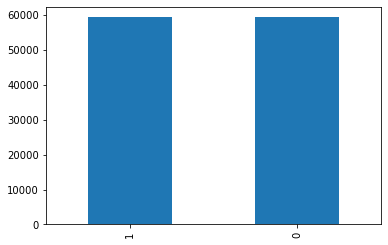

In [21]:
y_res.value_counts().plot(kind='bar')

In [34]:
print('Before smote')
print('x',x.shape)
print('After smote')
print('x_res',x_res.shape)

Before smote
x (81994, 41)
After smote
x_res (118720, 41)


### Performing Train_Test Split in a Stratified Fashion So that Balance of data is consistent in Train and Test for both classes. 

In [35]:
x_train_res,x_test_res,y_train_res,y_test_res=train_test_split(x_res,y_res,stratify=y_res,random_state=42)

### <font color='blue'>4.c.3)Logistic Regression Model with balanced data<font/>

In [36]:
model3=LogisticRegression(random_state=10)
model3.fit(x_train_res,y_train_res)
y_pred_logit_full_model_balance_data=model3.predict(x_test_res)

In [37]:
print('training accuracy',model3.score(x_train_res,y_train_res))
print('testing accuracy',model3.score(x_test_res,y_test_res))

training accuracy 0.5805929919137466
testing accuracy 0.5772911051212938


In [38]:
confusion_matrix(y_test_res,y_pred_logit_full_model_balance_data)

array([[9400, 5440],
       [7106, 7734]], dtype=int64)

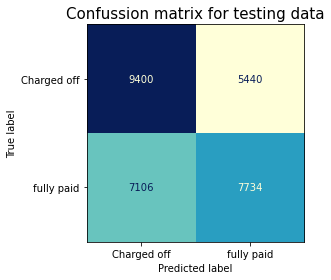

In [39]:
print(plot_confusion_matrix(estimator=model3,X=x_test_res,y_true=y_test_res,
                            cmap="YlGnBu",colorbar=False,display_labels=['Charged off','fully paid']))
plt.title('Confussion matrix for testing data',size=15)
plt.show()

In [40]:
print(classification_report(y_test_res,y_pred_logit_full_model_balance_data))

              precision    recall  f1-score   support

           0       0.57      0.63      0.60     14840
           1       0.59      0.52      0.55     14840

    accuracy                           0.58     29680
   macro avg       0.58      0.58      0.58     29680
weighted avg       0.58      0.58      0.58     29680



In [41]:
roc_auc_score(y_test_res,model3.predict_proba(x_test_res)[:,1])

0.6000863796034611

In [42]:
model_performance=model_performance.append(pd.DataFrame({'Model':['Logistic full model(balanced_data)'],'accuracy':[0.58],'roc_auc':[0.60]}),ignore_index=True)

In [43]:
model_performance

,Model,accuracy,roc_auc
0,Logistic full model(unscaled),0.72,0.63
1,Logistic full model(scaled),0.72,0.71
2,Logistic full model(balanced_data),0.58,0.60


### <font color='blue'> Model is not biased but underfit<font/>

### <font color='blue'>Important Features Selection<font/>

In [44]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import RFE

In [45]:
model4_a=DecisionTreeClassifier(random_state=10)
model4_a.fit(x_train_res,y_train_res)

DecisionTreeClassifier(random_state=10)

#### The Importance of each feature is sorted in such a way so that the most important is shown in Left.

In [46]:
a=pd.Series(dict(list(zip(x_train_res.columns,model4_a.feature_importances_))))
a.sort_values(ascending=False).to_frame(name='Feature Importance').T

,Credit Score,Current Loan Amount,Annual Income,Monthly Debt,Current Credit Balance,Maximum Open Credit,Years of Credit History,Home Ownership_Own Home,Number of Open Accounts,Home Ownership_Rent,...,Purpose_Buy a Car,Purpose_Medical Bills,Purpose_Buy House,Purpose_small_business,Purpose_major_purchase,Purpose_wedding,Purpose_renewable_energy,Purpose_moving,Purpose_Educational Expenses,Purpose_vacation
Feature Importance,0.28092,0.129655,0.115268,0.053079,0.048757,0.047621,0.047297,0.039853,0.03415,0.032618,...,0.001467,0.001174,0.000823,0.000396,0.000176,0.000104,0.000074,0.000058,0.000044,0.000041


#### Here we are taking a threshold of 0.05. Above this value of importance(derived from Full Grown Decision Tree Based Model) is considered here for selecting features.

In [47]:
imp_features=a[a>0.05].index.to_list()
imp_features

['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt']

### <font color='blue'>4.c.4)Logistic Regression Model with balanced data and important features<font/>

In [48]:
x_train_imp=x_train_res[imp_features]
x_test_imp=x_test_res[imp_features]

model4_b=LogisticRegression(random_state=10)

model4_b.fit(x_train_imp,y_train_res)

y_pred_logit_imp_feature=model4_b.predict(x_test_imp)

In [49]:
print('training accuracy',model4_b.score(x_train_imp,y_train_res))
print('testing accuracy',model4_b.score(x_test_imp,y_test_res))

training accuracy 0.5775494159928122
testing accuracy 0.5737533692722372


In [50]:
confusion_matrix(y_test_res,y_pred_logit_imp_feature)

array([[9299, 5541],
       [7110, 7730]], dtype=int64)

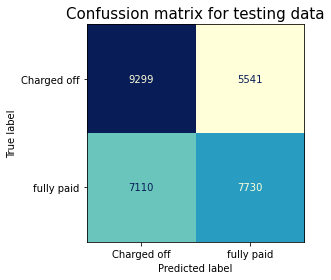

In [51]:
print(plot_confusion_matrix(estimator=model4_b,X=x_test_imp,y_true=y_test_res,
                            cmap="YlGnBu",colorbar=False,display_labels=['Charged off','fully paid']))
plt.title('Confussion matrix for testing data',size=15)
plt.show()

In [52]:
print(classification_report(y_test_res,y_pred_logit_imp_feature))

              precision    recall  f1-score   support

           0       0.57      0.63      0.60     14840
           1       0.58      0.52      0.55     14840

    accuracy                           0.57     29680
   macro avg       0.57      0.57      0.57     29680
weighted avg       0.57      0.57      0.57     29680



In [53]:
roc_auc_score(y_test_res,model4_b.predict_proba(x_test_imp)[:,1])

0.5963769652574451

In [54]:
model_performance=model_performance.append(pd.DataFrame({'Model':['Logistic model with imp_features(balanced_data)'],'accuracy':[0.57],'roc_auc':[0.60]}),ignore_index=True)

In [55]:
model_performance

,Model,accuracy,roc_auc
0,Logistic full model(unscaled),0.72,0.63
1,Logistic full model(scaled),0.72,0.71
2,Logistic full model(balanced_data),0.58,0.60
3,Logistic model with imp_features(balanced_data),0.57,0.60


### <font color='blue'>4.d) Decision tree classifier<font/>

### <font color='blue'>4.d.1) Decision Tree Full model with balanced data<font/>

In [56]:
model5=DecisionTreeClassifier(random_state=10)
model5.fit(x_train_res,y_train_res)
y_pred_dt_full_model_balance_data=model5.predict(x_test_res)

In [57]:
print('training accuracy',model5.score(x_train_res,y_train_res))
print('testing accuracy',model5.score(x_test_res,y_test_res))

training accuracy 1.0
testing accuracy 0.7912735849056604


In [58]:
confusion_matrix(y_test_res,y_pred_dt_full_model_balance_data)

array([[11860,  2980],
       [ 3215, 11625]], dtype=int64)

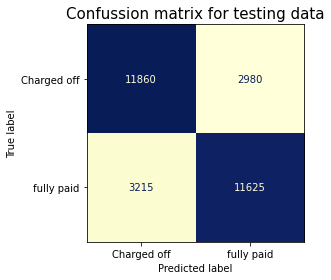

In [59]:
print(plot_confusion_matrix(estimator=model5,X=x_test_res,y_true=y_test_res,
                            cmap="YlGnBu",colorbar=False,display_labels=['Charged off','fully paid']))
plt.title('Confussion matrix for testing data',size=15)
plt.show()

In [60]:
print(classification_report(y_test_res,y_pred_dt_full_model_balance_data))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79     14840
           1       0.80      0.78      0.79     14840

    accuracy                           0.79     29680
   macro avg       0.79      0.79      0.79     29680
weighted avg       0.79      0.79      0.79     29680



In [61]:
roc_auc_score(y_test_res,model5.predict_proba(x_test_res)[:,1])

0.7912735849056604

In [62]:
model_performance=model_performance.append(pd.DataFrame({'Model':['Decision Tree full model(balanced_data)'],'accuracy':[0.79],'roc_auc':[0.79]}),ignore_index=True)

In [63]:
model_performance

,Model,accuracy,roc_auc
0,Logistic full model(unscaled),0.72,0.63
1,Logistic full model(scaled),0.72,0.71
2,Logistic full model(balanced_data),0.58,0.60
3,Logistic model with imp_features(balanced_data),0.57,0.60
4,Decision Tree full model(balanced_data),0.79,0.79


### <font color='blue'>4.d.1)Decision Tree with selected features and balanced data<font/>

In [64]:
x_train_imp=x_train_res[imp_features]
x_test_imp=x_test_res[imp_features]

model6=DecisionTreeClassifier(random_state=10)

model6.fit(x_train_imp,y_train_res)

y_pred_dt_imp_feature=model6.predict(x_test_imp)

In [65]:
print('training accuracy',model6.score(x_train_imp,y_train_res))
print('testing accuracy',model6.score(x_test_imp,y_test_res))

training accuracy 1.0
testing accuracy 0.7725404312668464


In [66]:
confusion_matrix(y_test_res,y_pred_dt_imp_feature)

array([[11502,  3338],
       [ 3413, 11427]], dtype=int64)

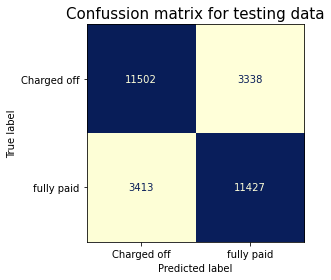

In [67]:
print(plot_confusion_matrix(estimator=model6,X=x_test_imp,y_true=y_test_res,
                            cmap="YlGnBu",colorbar=False,display_labels=['Charged off','fully paid']))
plt.title('Confussion matrix for testing data',size=15)
plt.show()

In [68]:
print(classification_report(y_test_res,y_pred_dt_imp_feature))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77     14840
           1       0.77      0.77      0.77     14840

    accuracy                           0.77     29680
   macro avg       0.77      0.77      0.77     29680
weighted avg       0.77      0.77      0.77     29680



In [69]:
roc_auc_score(y_test_res,model6.predict_proba(x_test_imp)[:,1])

0.7725404312668465

In [70]:
model_performance=model_performance.append(pd.DataFrame({'Model':['Decision Tree with important features(balanced_data)'],'accuracy':[0.77],'roc_auc':[0.77]}),ignore_index=True)

In [71]:
model_performance

,Model,accuracy,roc_auc
0,Logistic full model(unscaled),0.72,0.63
1,Logistic full model(scaled),0.72,0.71
2,Logistic full model(balanced_data),0.58,0.60
3,Logistic model with imp_features(balanced_data),0.57,0.60
4,Decision Tree full model(balanced_data),0.79,0.79
5,Decision Tree with important features(balanced...,0.77,0.77


### <font color='blue'>4.d) Random Forest classifier<font/>

### <font color='blue'>4.d.1) Random Forest Full model with balanced data<font/>

In [72]:
model7=RandomForestClassifier(random_state=10)
model7.fit(x_train_res,y_train_res)
y_pred_rf_full_model_balance_data=model7.predict(x_test_res)

In [73]:
print('training accuracy',model7.score(x_train_res,y_train_res))
print('testing accuracy',model7.score(x_test_res,y_test_res))

training accuracy 0.9999887690925426
testing accuracy 0.8427897574123989


In [74]:
confusion_matrix(y_test_res,y_pred_rf_full_model_balance_data)

array([[11808,  3032],
       [ 1634, 13206]], dtype=int64)

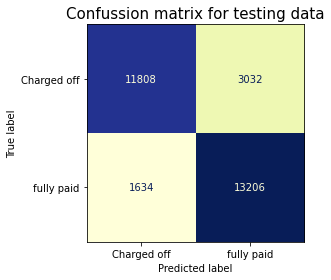

In [75]:
print(plot_confusion_matrix(estimator=model7,X=x_test_res,y_true=y_test_res,
                            cmap="YlGnBu",colorbar=False,display_labels=['Charged off','fully paid']))
plt.title('Confussion matrix for testing data',size=15)
plt.show()

In [76]:
print(classification_report(y_test_res,y_pred_rf_full_model_balance_data))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84     14840
           1       0.81      0.89      0.85     14840

    accuracy                           0.84     29680
   macro avg       0.85      0.84      0.84     29680
weighted avg       0.85      0.84      0.84     29680



In [77]:
roc_auc_score(y_test_res,model7.predict_proba(x_test_res)[:,1])

0.9301963577349772

In [78]:
model_performance=model_performance.append(pd.DataFrame({'Model':['Random Forest full model(balanced_data)'],'accuracy':[0.84],'roc_auc':[0.93]}),ignore_index=True)

In [79]:
model_performance

,Model,accuracy,roc_auc
0,Logistic full model(unscaled),0.72,0.63
1,Logistic full model(scaled),0.72,0.71
2,Logistic full model(balanced_data),0.58,0.60
3,Logistic model with imp_features(balanced_data),0.57,0.60
4,Decision Tree full model(balanced_data),0.79,0.79
5,Decision Tree with important features(balanced...,0.77,0.77
6,Random Forest full model(balanced_data),0.84,0.93


### <font color='blue'>4.d.1)Random Forest with selected features and balanced data<font/>

In [80]:
x_train_imp=x_train_res[imp_features]
x_test_imp=x_test_res[imp_features]

model8=RandomForestClassifier(random_state=10)

model8.fit(x_train_imp,y_train_res)

y_pred_rf_imp_feature=model8.predict(x_test_imp)

In [81]:
print('training accuracy',model8.score(x_train_imp,y_train_res))
print('testing accuracy',model8.score(x_test_imp,y_test_res))

training accuracy 1.0
testing accuracy 0.805256064690027


In [82]:
confusion_matrix(y_test_res,y_pred_rf_imp_feature)

array([[12517,  2323],
       [ 3457, 11383]], dtype=int64)

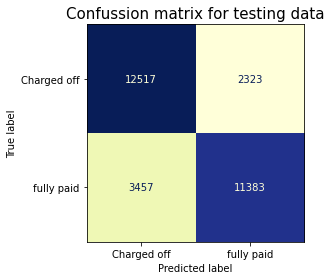

In [83]:
print(plot_confusion_matrix(estimator=model8,X=x_test_imp,y_true=y_test_res,
                            cmap="YlGnBu",colorbar=False,display_labels=['Charged off','fully paid']))
plt.title('Confussion matrix for testing data',size=15)
plt.show()

In [84]:
print(classification_report(y_test_res,y_pred_rf_imp_feature))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81     14840
           1       0.83      0.77      0.80     14840

    accuracy                           0.81     29680
   macro avg       0.81      0.81      0.80     29680
weighted avg       0.81      0.81      0.80     29680



In [85]:
roc_auc_score(y_test_res,model8.predict_proba(x_test_imp)[:,1])

0.9014001800880552

In [86]:
model_performance=model_performance.append(pd.DataFrame({'Model':['Random Forest with important feature(balanced_data)'],'accuracy':[0.81],'roc_auc':[0.90]}),ignore_index=True)

In [87]:
model_performance

,Model,accuracy,roc_auc
0,Logistic full model(unscaled),0.72,0.63
1,Logistic full model(scaled),0.72,0.71
2,Logistic full model(balanced_data),0.58,0.60
3,Logistic model with imp_features(balanced_data),0.57,0.60
4,Decision Tree full model(balanced_data),0.79,0.79
5,Decision Tree with important features(balanced...,0.77,0.77
6,Random Forest full model(balanced_data),0.84,0.93
7,Random Forest with important feature(balanced_...,0.81,0.90


### <font color='blue'>4.d) K-Nearest Neighbors classifier<font/>

### <font color='blue'>4.d.1) KNN Full model with balanced data<font/>

In [88]:
model9=KNeighborsClassifier()
model9.fit(x_train_res,y_train_res)
y_pred_knn_full_model_balance_data=model9.predict(x_test_res)

In [89]:
print('training accuracy',model9.score(x_train_res,y_train_res))
print('testing accuracy',model9.score(x_test_res,y_test_res))

training accuracy 0.8482704402515723
testing accuracy 0.7633423180592992


In [90]:
confusion_matrix(y_test_res,y_pred_knn_full_model_balance_data)

array([[12595,  2245],
       [ 4779, 10061]], dtype=int64)

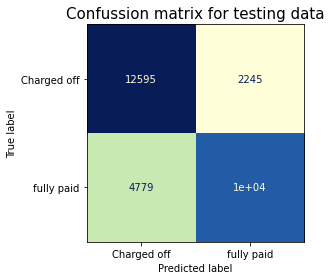

In [91]:
print(plot_confusion_matrix(estimator=model9,X=x_test_res,y_true=y_test_res,
                            cmap="YlGnBu",colorbar=False,display_labels=['Charged off','fully paid']))
plt.title('Confussion matrix for testing data',size=15)
plt.show()

In [92]:
print(classification_report(y_test_res,y_pred_knn_full_model_balance_data))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78     14840
           1       0.82      0.68      0.74     14840

    accuracy                           0.76     29680
   macro avg       0.77      0.76      0.76     29680
weighted avg       0.77      0.76      0.76     29680



In [93]:
roc_auc_score(y_test_res,model9.predict_proba(x_test_res)[:,1])

0.8440714294795882

In [94]:
model_performance=model_performance.append(pd.DataFrame({'Model':['KNN full model(balanced_data)'],'accuracy':[0.76],'roc_auc':[0.84]}),ignore_index=True)

In [95]:
model_performance

,Model,accuracy,roc_auc
0,Logistic full model(unscaled),0.72,0.63
1,Logistic full model(scaled),0.72,0.71
2,Logistic full model(balanced_data),0.58,0.60
3,Logistic model with imp_features(balanced_data),0.57,0.60
4,Decision Tree full model(balanced_data),0.79,0.79
5,Decision Tree with important features(balanced...,0.77,0.77
6,Random Forest full model(balanced_data),0.84,0.93
7,Random Forest with important feature(balanced_...,0.81,0.90
8,KNN full model(balanced_data),0.76,0.84


### <font color='blue'>4.d.1)KNN with selected features and balanced data<font/>

In [96]:
x_train_imp=x_train_res[imp_features]
x_test_imp=x_test_res[imp_features]

model10=RandomForestClassifier(random_state=10)

model10.fit(x_train_imp,y_train_res)

y_pred_knn_imp_feature=model8.predict(x_test_imp)

In [97]:
print('training accuracy',model10.score(x_train_imp,y_train_res))
print('testing accuracy',model10.score(x_test_imp,y_test_res))

training accuracy 1.0
testing accuracy 0.805256064690027


In [98]:
confusion_matrix(y_test_res,y_pred_knn_imp_feature)

array([[12517,  2323],
       [ 3457, 11383]], dtype=int64)

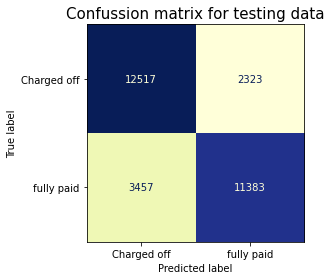

In [99]:
print(plot_confusion_matrix(estimator=model10,X=x_test_imp,y_true=y_test_res,
                            cmap="YlGnBu",colorbar=False,display_labels=['Charged off','fully paid']))
plt.title('Confussion matrix for testing data',size=15)
plt.show()

In [100]:
print(classification_report(y_test_res,y_pred_knn_imp_feature))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81     14840
           1       0.83      0.77      0.80     14840

    accuracy                           0.81     29680
   macro avg       0.81      0.81      0.80     29680
weighted avg       0.81      0.81      0.80     29680



In [101]:
roc_auc_score(y_test_res,model10.predict_proba(x_test_imp)[:,1])

0.9014001800880552

In [102]:
model_performance=model_performance.append(pd.DataFrame({'Model':['KNN with important feature(balanced_data)'],'accuracy':[0.81],'roc_auc':[0.90]}),ignore_index=True)

In [103]:
model_performance

,Model,accuracy,roc_auc
0,Logistic full model(unscaled),0.72,0.63
1,Logistic full model(scaled),0.72,0.71
2,Logistic full model(balanced_data),0.58,0.60
3,Logistic model with imp_features(balanced_data),0.57,0.60
4,Decision Tree full model(balanced_data),0.79,0.79
5,Decision Tree with important features(balanced...,0.77,0.77
6,Random Forest full model(balanced_data),0.84,0.93
7,Random Forest with important feature(balanced_...,0.81,0.90
8,KNN full model(balanced_data),0.76,0.84
9,KNN with important feature(balanced_data),0.81,0.90


### <font color='blue'>4.d) Gaussian Naive Bayes classifier<font/>

### <font color='blue'>4.d.1) Gaussian NB Full model with balanced data<font/>

In [104]:
model11=GaussianNB()
model11.fit(x_train_res,y_train_res)
y_pred_gnb_full_model_balance_data=model11.predict(x_test_res)

In [105]:
print('training accuracy',model11.score(x_train_res,y_train_res))
print('testing accuracy',model11.score(x_test_res,y_test_res))

training accuracy 0.5128256963162624
testing accuracy 0.5109501347708895


In [106]:
confusion_matrix(y_test_res,y_pred_gnb_full_model_balance_data)

array([[14205,   635],
       [13880,   960]], dtype=int64)

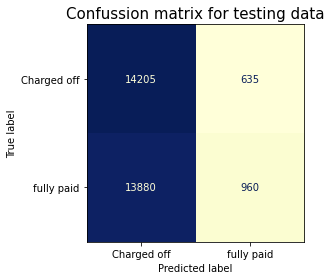

In [107]:
print(plot_confusion_matrix(estimator=model11,X=x_test_res,y_true=y_test_res,
                            cmap="YlGnBu",colorbar=False,display_labels=['Charged off','fully paid']))
plt.title('Confussion matrix for testing data',size=15)
plt.show()

In [108]:
print(classification_report(y_test_res,y_pred_gnb_full_model_balance_data))

              precision    recall  f1-score   support

           0       0.51      0.96      0.66     14840
           1       0.60      0.06      0.12     14840

    accuracy                           0.51     29680
   macro avg       0.55      0.51      0.39     29680
weighted avg       0.55      0.51      0.39     29680



In [109]:
roc_auc_score(y_test_res,model11.predict_proba(x_test_res)[:,1])

0.6028019676186602

In [110]:
model_performance=model_performance.append(pd.DataFrame({'Model':['Gaussian NB full model(balanced_data)'],'accuracy':[0.51],'roc_auc':[0.60]}),ignore_index=True)

In [111]:
model_performance

,Model,accuracy,roc_auc
0,Logistic full model(unscaled),0.72,0.63
1,Logistic full model(scaled),0.72,0.71
2,Logistic full model(balanced_data),0.58,0.60
3,Logistic model with imp_features(balanced_data),0.57,0.60
4,Decision Tree full model(balanced_data),0.79,0.79
5,Decision Tree with important features(balanced...,0.77,0.77
6,Random Forest full model(balanced_data),0.84,0.93
7,Random Forest with important feature(balanced_...,0.81,0.90
8,KNN full model(balanced_data),0.76,0.84
9,KNN with important feature(balanced_data),0.81,0.90


### <font color='blue'>4.d.1)Gaussian Naive Bayes with selected features and balanced data<font/>

In [112]:
x_train_imp=x_train_res[imp_features]
x_test_imp=x_test_res[imp_features]

model12=GaussianNB()

model12.fit(x_train_imp,y_train_res)

y_pred_gnb_imp_feature=model8.predict(x_test_imp)

In [113]:
print('training accuracy',model12.score(x_train_imp,y_train_res))
print('testing accuracy',model12.score(x_test_imp,y_test_res))

training accuracy 0.5945754716981132
testing accuracy 0.5907681940700809


In [114]:
confusion_matrix(y_test_res,y_pred_gnb_imp_feature)

array([[12517,  2323],
       [ 3457, 11383]], dtype=int64)

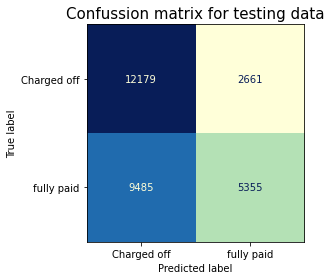

In [115]:
print(plot_confusion_matrix(estimator=model12,X=x_test_imp,y_true=y_test_res,
                            cmap="YlGnBu",colorbar=False,display_labels=['Charged off','fully paid']))
plt.title('Confussion matrix for testing data',size=15)
plt.show()

In [116]:
print(classification_report(y_test_res,y_pred_gnb_imp_feature))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81     14840
           1       0.83      0.77      0.80     14840

    accuracy                           0.81     29680
   macro avg       0.81      0.81      0.80     29680
weighted avg       0.81      0.81      0.80     29680



In [117]:
roc_auc_score(y_test_res,model12.predict_proba(x_test_imp)[:,1])

0.6726274988012293

In [118]:
model_performance=model_performance.append(pd.DataFrame({'Model':['Gaussian NB with important feature(balanced_data)'],'accuracy':[0.81],'roc_auc':[0.67]}),ignore_index=True)

In [119]:
model_performance

,Model,accuracy,roc_auc
0,Logistic full model(unscaled),0.72,0.63
1,Logistic full model(scaled),0.72,0.71
2,Logistic full model(balanced_data),0.58,0.60
3,Logistic model with imp_features(balanced_data),0.57,0.60
4,Decision Tree full model(balanced_data),0.79,0.79
5,Decision Tree with important features(balanced...,0.77,0.77
6,Random Forest full model(balanced_data),0.84,0.93
7,Random Forest with important feature(balanced_...,0.81,0.90
8,KNN full model(balanced_data),0.76,0.84
9,KNN with important feature(balanced_data),0.81,0.90


### <font color='blue'>4.d) Multinomial Naive Bayes classifier<font/>

### <font color='blue'>4.d.1) Multinomial NB Full model with balanced data<font/>

In [120]:
model13=MultinomialNB()
model13.fit(x_train_res,y_train_res)
y_pred_mnb_full_model_balance_data=model13.predict(x_test_res)

In [121]:
print('training accuracy',model13.score(x_train_res,y_train_res))
print('testing accuracy',model13.score(x_test_res,y_test_res))

training accuracy 0.5189465408805032
testing accuracy 0.5190026954177898


In [122]:
confusion_matrix(y_test_res,y_pred_mnb_full_model_balance_data)

array([[11385,  3455],
       [10821,  4019]], dtype=int64)

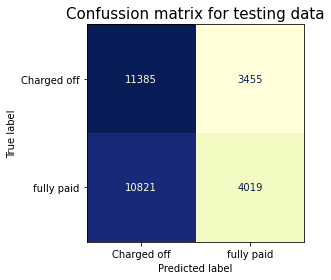

In [123]:
print(plot_confusion_matrix(estimator=model13,X=x_test_res,y_true=y_test_res,
                            cmap="YlGnBu",colorbar=False,display_labels=['Charged off','fully paid']))
plt.title('Confussion matrix for testing data',size=15)
plt.show()

In [124]:
print(classification_report(y_test_res,y_pred_mnb_full_model_balance_data))

              precision    recall  f1-score   support

           0       0.51      0.77      0.61     14840
           1       0.54      0.27      0.36     14840

    accuracy                           0.52     29680
   macro avg       0.53      0.52      0.49     29680
weighted avg       0.53      0.52      0.49     29680



In [125]:
roc_auc_score(y_test_res,model13.predict_proba(x_test_res)[:,1])

0.5192109909111383

In [126]:
model_performance=model_performance.append(pd.DataFrame({'Model':['Multinomial NB full model(balanced_data)'],'accuracy':[0.52],'roc_auc':[0.52]}),ignore_index=True)

In [127]:
model_performance

,Model,accuracy,roc_auc
0,Logistic full model(unscaled),0.72,0.63
1,Logistic full model(scaled),0.72,0.71
2,Logistic full model(balanced_data),0.58,0.60
3,Logistic model with imp_features(balanced_data),0.57,0.60
4,Decision Tree full model(balanced_data),0.79,0.79
5,Decision Tree with important features(balanced...,0.77,0.77
6,Random Forest full model(balanced_data),0.84,0.93
7,Random Forest with important feature(balanced_...,0.81,0.90
8,KNN full model(balanced_data),0.76,0.84
9,KNN with important feature(balanced_data),0.81,0.90


### <font color='blue'>4.d.1)Multinomial Naive Bayes with selected features and balanced data<font/>

In [128]:
x_train_imp=x_train_res[imp_features]
x_test_imp=x_test_res[imp_features]

model14=MultinomialNB()

model14.fit(x_train_imp,y_train_res)

y_pred_mnb_imp_feature=model14.predict(x_test_imp)

In [129]:
print('training accuracy',model14.score(x_train_imp,y_train_res))
print('testing accuracy',model14.score(x_test_imp,y_test_res))

training accuracy 0.487848158131177
testing accuracy 0.4912061994609164


In [130]:
confusion_matrix(y_test_res,y_pred_mnb_imp_feature)

array([[7814, 7026],
       [8075, 6765]], dtype=int64)

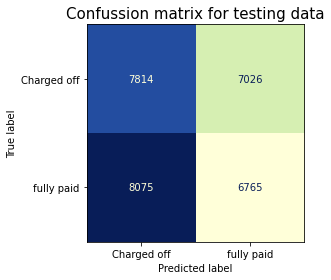

In [131]:
print(plot_confusion_matrix(estimator=model14,X=x_test_imp,y_true=y_test_res,
                            cmap="YlGnBu",colorbar=False,display_labels=['Charged off','fully paid']))
plt.title('Confussion matrix for testing data',size=15)
plt.show()

In [132]:
print(classification_report(y_test_res,y_pred_mnb_imp_feature))

              precision    recall  f1-score   support

           0       0.49      0.53      0.51     14840
           1       0.49      0.46      0.47     14840

    accuracy                           0.49     29680
   macro avg       0.49      0.49      0.49     29680
weighted avg       0.49      0.49      0.49     29680



In [133]:
roc_auc_score(y_test_res,model14.predict_proba(x_test_imp)[:,1])

0.48608203814633716

In [134]:
model_performance=model_performance.append(pd.DataFrame({'Model':['Multinomial NB with important feature(balanced_data)'],'accuracy':[0.49],'roc_auc':[0.49]}),ignore_index=True)

In [135]:
model_performance

,Model,accuracy,roc_auc
0,Logistic full model(unscaled),0.72,0.63
1,Logistic full model(scaled),0.72,0.71
2,Logistic full model(balanced_data),0.58,0.60
3,Logistic model with imp_features(balanced_data),0.57,0.60
4,Decision Tree full model(balanced_data),0.79,0.79
5,Decision Tree with important features(balanced...,0.77,0.77
6,Random Forest full model(balanced_data),0.84,0.93
7,Random Forest with important feature(balanced_...,0.81,0.90
8,KNN full model(balanced_data),0.76,0.84
9,KNN with important feature(balanced_data),0.81,0.90


### <font color='blue'> Plotting Model Performance metrics for different Models</font>

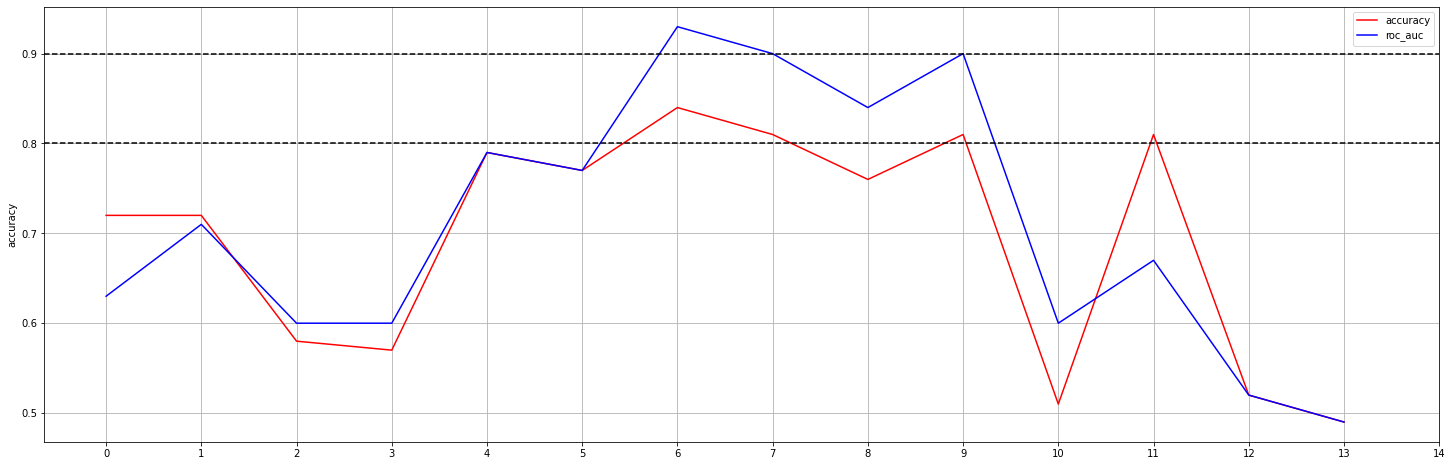

In [136]:
plt.figure(figsize=(25,8))
sns.lineplot(x=model_performance.index, y = 'accuracy',color='red',data= model_performance,label='accuracy')
sns.lineplot(x=model_performance.index, y = 'roc_auc',color='blue',data= model_performance,label='roc_auc')
plt.axhline(0.8,color='black',linestyle='--')
plt.axhline(0.9,color='black',linestyle='--')
plt.xticks(np.arange(0, len(model_performance)+1, 1))
plt.grid()
plt.legend()

### <font color='blue'>Inference:
* From the above diagram we can see that , the model at index 4,5,6,7,9 are showing good accuracy score.
* Model at index 6 slightly tends to `over-fit` , but that can be controlled by performing hyper-tuning.
* Rest of the models are not showing good performances in terms of accuracy and `roc_auc` score both.
* So, futher we will try to tune the models at index 4,5,6,7 and 9. These are respectively:
    * Decision Tree full model(balanced_data)	
    * Decision Tree with important features(balanced_data)
    * Random Forest full model(balanced_data)
    * Random Forest with important feature(balanced_data)
    * KNN with important feature(balanced_data)	<font/>


### <font color='red'>DecisionTreeClassifier full model with Hyperparamter Tuning<font/>

In [137]:
model_dt_full=DecisionTreeClassifier(random_state=42)
param={'criterion':['gini','entropy'],'max_depth':list(range(1,100)),'min_samples_split':list(range(1,100)),'min_samples_leaf':
      list(range(1,100))}
grid1=RandomizedSearchCV(estimator=model_dt_full,param_distributions=param,n_iter=100,cv=5,random_state=42)
grid1.fit(x_train_res,y_train_res)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22, 23, 24, 25, 26,
                                                             27, 28, 29, 30, ...],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11,
                                                              12, 13, 14, 15,
                                                              16, 17, 18, 19,
                                                              20, 21, 22, 23,
                                                              24, 25, 26, 27,
                                                              28, 29, 30, ...]},
                   random_state=42)

In [139]:
grid1.best_params_

{'min_samples_split': 41,
 'min_samples_leaf': 63,
 'max_depth': 36,
 'criterion': 'entropy'}

In [140]:
tuned_model_dt_full=DecisionTreeClassifier(min_samples_split=41,min_samples_leaf=63,max_depth=36,criterion='entropy',random_state=42)
tuned_model_dt_full.fit(x_train_res,y_train_res)
y_pred_DT_full_HP=tuned_model_dt_full.predict(x_test_res)

In [141]:
# score for test and train data
print('training accuracy',tuned_model_dt_full.score(x_train_res,y_train_res))
print('testing accuracy',tuned_model_dt_full.score(x_test_res,y_test_res))

training accuracy 0.8345575022461815
testing accuracy 0.8060646900269541


In [142]:
confusion_matrix(y_test_res,y_pred_DT_full_HP)

array([[11352,  3488],
       [ 2268, 12572]], dtype=int64)

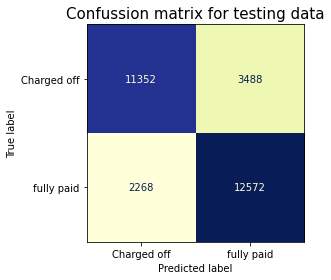

In [143]:
print(plot_confusion_matrix(estimator=tuned_model_dt_full,X=x_test_res,y_true=y_test_res,
                            cmap="YlGnBu",colorbar=False,display_labels=['Charged off','fully paid']))
plt.title('Confussion matrix for testing data',size=15)
plt.show()

In [147]:
print(classification_report(y_test_res,y_pred_DT_full_HP))

              precision    recall  f1-score   support

           0       0.83      0.76      0.80     14840
           1       0.78      0.85      0.81     14840

    accuracy                           0.81     29680
   macro avg       0.81      0.81      0.81     29680
weighted avg       0.81      0.81      0.81     29680



In [148]:
roc_auc_score(y_test_res,tuned_model_dt_full.predict_proba(x_test_res)[:,1])

0.9061102501253259

In [149]:
model_performance=model_performance.append(pd.DataFrame({'Model':['Decision Tree full model(Hyperparameter tuning)'],'accuracy':[0.81],'roc_auc':[0.91]}),ignore_index=True)

In [170]:
model_performance

,Model,accuracy,roc_auc
0,Logistic full model(unscaled),0.72,0.63
1,Logistic full model(scaled),0.72,0.71
2,Logistic full model(balanced_data),0.58,0.60
3,Logistic model with imp_features(balanced_data),0.57,0.60
4,Decision Tree full model(balanced_data),0.79,0.79
5,Decision Tree with important features(balanced_data),0.77,0.77
6,Random Forest full model(balanced_data),0.84,0.93
7,Random Forest with important feature(balanced_data),0.81,0.90
8,KNN full model(balanced_data),0.76,0.84
9,KNN with important feature(balanced_data),0.81,0.90


### <font color='red'>DecisionTreeClassifier with important features and with Hyperparamter Tuning<font/>

In [151]:
model_dt_imp_feat=DecisionTreeClassifier(random_state=42)
param={'criterion':['gini','entropy'],'max_depth':list(range(1,100)),'min_samples_split':list(range(1,100)),'min_samples_leaf':
      list(range(1,100))}
grid2=RandomizedSearchCV(estimator=model_dt_imp_feat,param_distributions=param,n_iter=100,cv=5,random_state=42)
grid2.fit(x_train_imp,y_train_res)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22, 23, 24, 25, 26,
                                                             27, 28, 29, 30, ...],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11,
                                                              12, 13, 14, 15,
                                                              16, 17, 18, 19,
                                                              20, 21, 22, 23,
                                                              24, 25, 26, 27,
                                                              28, 29, 30, ...]},
                   random_state=42)

In [152]:
grid2.best_params_

{'min_samples_split': 94,
 'min_samples_leaf': 54,
 'max_depth': 51,
 'criterion': 'entropy'}

In [153]:
tuned_model_dt_imp_feat=DecisionTreeClassifier(min_samples_split=94,min_samples_leaf=54,max_depth=51,criterion='entropy',random_state=42)
tuned_model_dt_imp_feat.fit(x_train_imp,y_train_res)
y_pred_DT_imp_HP=tuned_model_dt_imp_feat.predict(x_test_imp)

In [154]:
# score for test and train data
print('training accuracy',tuned_model_dt_imp_feat.score(x_train_imp,y_train_res))
print('testing accuracy',tuned_model_dt_imp_feat.score(x_test_imp,y_test_res))

training accuracy 0.8173292902066487
testing accuracy 0.7898247978436658


In [155]:
confusion_matrix(y_test_res,y_pred_DT_imp_HP)

array([[11748,  3092],
       [ 3146, 11694]], dtype=int64)

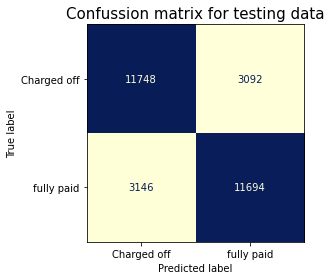

In [156]:
print(plot_confusion_matrix(estimator=tuned_model_dt_imp_feat,X=x_test_imp,y_true=y_test_res,
                            cmap="YlGnBu",colorbar=False,display_labels=['Charged off','fully paid']))
plt.title('Confussion matrix for testing data',size=15)
plt.show()

In [158]:
print(classification_report(y_test_res,y_pred_DT_imp_HP))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79     14840
           1       0.79      0.79      0.79     14840

    accuracy                           0.79     29680
   macro avg       0.79      0.79      0.79     29680
weighted avg       0.79      0.79      0.79     29680



In [160]:
roc_auc_score(y_test_res,tuned_model_dt_imp_feat.predict_proba(x_test_imp)[:,1])

0.8877841813122545

In [161]:
model_performance=model_performance.append(pd.DataFrame({'Model':['Decision Tree with important features(Hyperparameter tuning)'],'accuracy':[0.79],'roc_auc':[0.89]}),ignore_index=True)

In [168]:
model_performance

,Model,accuracy,roc_auc
0,Logistic full model(unscaled),0.72,0.63
1,Logistic full model(scaled),0.72,0.71
2,Logistic full model(balanced_data),0.58,0.60
3,Logistic model with imp_features(balanced_data),0.57,0.60
4,Decision Tree full model(balanced_data),0.79,0.79
5,Decision Tree with important features(balanced_data),0.77,0.77
6,Random Forest full model(balanced_data),0.84,0.93
7,Random Forest with important feature(balanced_data),0.81,0.90
8,KNN full model(balanced_data),0.76,0.84
9,KNN with important feature(balanced_data),0.81,0.90


### <font color='blue'> Plotting Model Performance metrics for different Models</font>

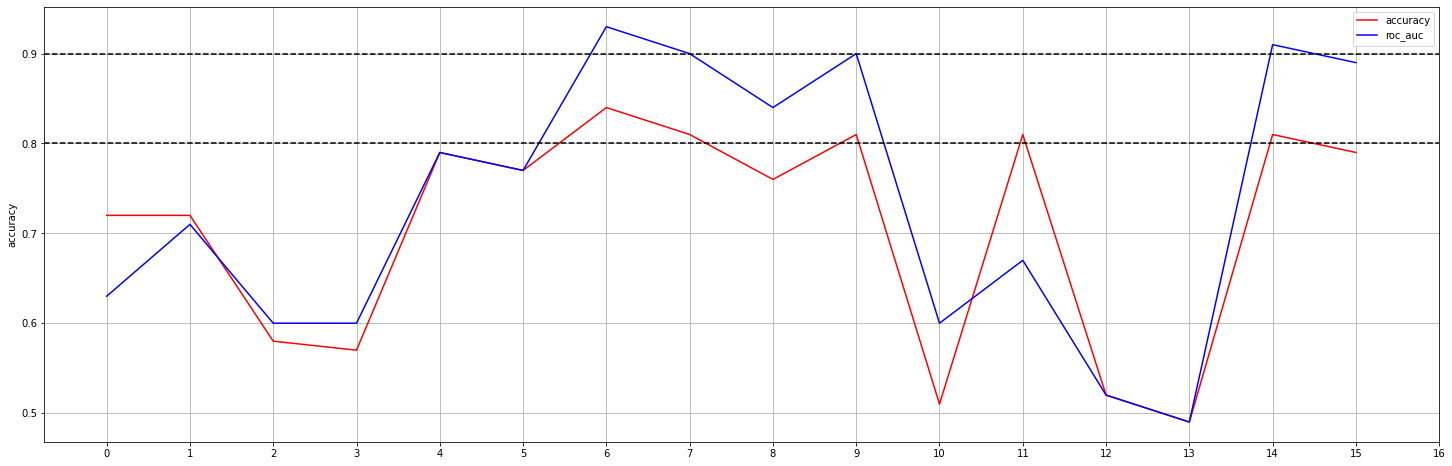

In [171]:
plt.figure(figsize=(25,8))
sns.lineplot(x=model_performance.index, y = 'accuracy',color='red',data= model_performance,label='accuracy')
sns.lineplot(x=model_performance.index, y = 'roc_auc',color='blue',data= model_performance,label='roc_auc')
plt.axhline(0.8,color='black',linestyle='--')
plt.axhline(0.9,color='black',linestyle='--')
plt.xticks(np.arange(0, len(model_performance)+1, 1))
plt.grid()
plt.legend()

# Future agenda:
* Try other models like XGBoost, ADABoost,SVM etc. 
* Follow the above procedure to hyper parameter tune rest of the selected models and eventually decide which model is to be chosen .
* Try to combine few features to make composite features.
* Check Optimal threshold for feature importance.
* Check cardinality issue.